# Result Summary  with super fine CS
This notebook replicate the result summary using only cs size = 1

A. Overview

0. upsetR plot for SNPs
1. Landing TSS
2. Annotation
3. Distal signals




# With 0.9 purity

In [ ]:
a = readRDS("/mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl/output/susie_per_gene_tad/cache/")

In [6]:
h16 =  read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/haQTL_pure_completed_unlimited_16_99pCS.tsv","\t")
m16 =  read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/mQTL_pure_completed_unlimited_16_99pCS.tsv","\t")



Rows: 21527 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref, alt, molecular_trait_id
dbl (11): snps_index, chromosome, position, cs_order, pip, finemapped_region...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 53860 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref, alt, molecular_trait_id
dbl (11): snps_index, chromosome, position, cs_order, pip, finemapped_region...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
pQTL = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/pqtl.all_variants_99pCS.tsv","\t")
eQTL = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/eqtl.all_variants_99pCS.tsv","\t")

Rows: 53661 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): variants, ref, alt, cs_order, log10_base_factor, molecular_trait_i...
dbl (10): snps_index, chromosome, position, pip, posterior_mean, posterior_s...
lgl  (1): cs_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 322701 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): variants, ref, alt, cs_order, log10_base_factor, molecular_trait_id
dbl (10): snps_index, chromosome, position, pip, posterior_mean, posterior_s...
lgl  (1): cs_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
h16%>%filter(abs(purity) > 0.9)-> h16
m16%>%filter(abs(purity) > 0.9)-> m16

In [28]:
pQTL_cs = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/pqtl.all_cs.tsv","\t")
eQTL_cs = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/eqtl_all_cs.tsv"," ")

Rows: 3985 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (8): phenotype, V, effect_id, cs_log10bf, cs_min_r2, cs_avg_r2, coverage...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 36527 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr (12): molecular_trait_id, chromosome, finemapped_region_start, finemappe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [48]:
eQTL%>%separate(cs_order,sep = " ",into = c("tmp1","tmp2"))%>%mutate(cs = str_remove(tmp1,pattern =  "c\\("))%>%mutate(cs_id = paste0(molecular_trait_id,cs))->eQTL

Warning message:
“Expected 2 pieces. Additional pieces discarded in 322701 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [33]:
eQTL_cs%>%filter(chromosome != "chromosome", coverage != "0",cs_min_r2 > 0.9)-> eqtl_cs

In [52]:
eqtl_cs%>%mutate(cs_id = paste0(molecular_trait_id,effect_id))-> eqtl_cs

In [55]:
eQTL%>%filter(cs_id  %in% eqtl_cs$cs_id)-> eQTL

In [56]:
eQTL%>%write_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/pqtl.all_variants_99pCS_0.9_pure.tsv","\t")

In [75]:
pQTL_cs = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/pqtl.all_effect_path","\t",col_names = F)


Rows: 6010 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
pQTL_cs%>%mutate(df = map(X1, ~read_delim(.x)))%>%separate(X1, sep = "\\.",into= c("tmp1","tmp2","ID"))%>%select(ID,df)-> pQTL_cs

Rows: 10 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): phenotype, effect_id, cs
dbl (5): V, cs_log10bf, cs_min_r2, cs_avg_r2, coverage

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 10 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): phenotype, effect_id, cs
dbl (5): V, cs_log10bf, cs_min_r2, cs_avg_r2, coverage

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 10 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): phenotype, effect_id, cs
dbl (5): V, cs_log10bf, cs_min_r2, cs_avg_r2, coverage

ℹ Use `spec()` to retrieve the full column specification for this data.

In [74]:
pQTL%>%count(molecular_trait_id)

molecular_trait_id,n
<chr>,<int>
10_ACADSB_P45954,10
10_ADD3_Q9UEY8,70
10_ADK_P55263,21
10_ADO_Q96SZ5,11
10_AFAP1L2_Q8N4X5,32
10_AIFM2_Q9BRQ8,1
10_AKR1C1_Q04828,125
10_AKR1C3_P42330,85
10_ARHGAP12_Q8IWW6,86


In [73]:
pQTL_cs%>%nrow

[1] 1066

# With 1 snp superfine cs

## Global result

## Sharing of effect

In [2]:
library("stringr")
library("dplyr")
library("readr")
library("ggplot2")
library("purrr")
library("tidyr")
library("ComplexUpset")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [146]:
options(repr.plot.width =30, repr.plot.height = 20)

In [ ]:
shared_snp_16 = readRDS("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/updated_16/haQTL_mQTL_eQTL_pQTL.UpSetR.rds")


In [ ]:
h16 = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/haQTL_pure_completed_unlimited_16.tsv")
m16 = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/meQTL_pure_completed_unlimited_16.tsv")
joint = inner_join(h16,m16, by = "variants")

shared_cs_map = joint%>%count(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y)

In [ ]:
upset_stripes

In [26]:
a  = readRDS("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/updated_16//haQTL_mQTL_eQTL_pQTL.UpSetR_mQTL_cs.rds")
b  = readRDS("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/updated_16/haQTL_mQTL_eQTL_pQTL.UpSetR_haQTL_cs.rds")
c =  readRDS("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/updated_16/haQTL_mQTL_eQTL_pQTL.UpSetR_eQTL_cs.rds")

combind_cs_ha = rbind(a[[1]],b[[1]]%>%mutate(id = paste0(molecular_trait_id,"_",cs_order ))%>%filter(!id %in% (shared_cs_map%>%mutate(id = paste0(molecular_trait_id.x,"_",cs_order.x ))%>%pull(id) )))%>%filter()
combind_cs_me = rbind(a[[1]]%>%mutate(id = paste0(molecular_trait_id,"_",cs_order ))%>%filter(!id %in% (shared_cs_map%>%mutate(id = paste0(molecular_trait_id.y,"_",cs_order.y ))%>%pull(id) )),b[[1]])%>%filter()
cs_e = c[[1]]%>%mutate(id = paste0(molecular_trait_id,"_",cs_order ))%>%filter(!haQTL & !mQTL )
combind_cs = rbind(combind_cs_me%>%mutate(cs_order = as.character(cs_order)), cs_e)
e = upset(combind_cs%>%dplyr::select(haQTL,mQTL,eQTL,pQTL)%>%as.data.frame,intersect = c("mQTL","haQTL","eQTL","pQTL"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 5)  )+ylab("")+annotate("point", y = 2500, x = c(4:14), color = "blue"  )   ) ,
          themes=upset_default_themes(axis.text=element_text(size=30), axis.title.x = element_blank()  )     ,  
          min_degree = 1)

Adding missing grouping variables: `molecular_trait_id`


In [ ]:
upset(c[[1]],intersect = c("mQTL","haQTL","eQTL","pQTL"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 5)  )+ylab("")  ) ,
          themes=upset_default_themes(axis.text=element_text(size=30), axis.title.x = element_blank()  )     ,  
          min_degree = 1)

In [ ]:
e = upset(combind_cs%>%dplyr::select(haQTL,mQTL,eQTL,pQTL)%>%as.data.frame,intersect = c("mQTL","haQTL","eQTL","pQTL"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 10)  )+ylab("")+annotate("point", y = 2500, x = c(4:14), color = "blue", size = 5  ) + annotate("point", y = 2500, x = c(7), color = "red", size = 5  )       ) ,
          themes=upset_default_themes(plot.margin=unit(c(0,0,0,20),"mm"),axis.text=element_text(size=40), axis.title.x = element_blank() ,text=element_text(size=40) )     ,  
          min_degree = 1)
e

In [ ]:
upset(combind_cs%>%dplyr::select(haQTL,mQTL,eQTL,pQTL)%>%as.data.frame,intersect = c("mQTL","haQTL","eQTL","pQTL"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 10)  )+ylab("")+annotate("point", y = 2500, x = c(4:14), color = "blue", size = 5  ) + annotate("point", y = 2500, x = c(7), color = "red", size = 5  )    ) ,
          themes=upset_default_themes(axis.text=element_text(size=30), axis.title.x = element_blank() ,text=element_text(size=100) )     ,  
          min_degree = 1)

In [56]:
m16_effect = m16%>%count(molecular_trait_id)%>%select(-n)%>%mutate(type = "mQTL", effect_tibble_path = paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_meQTL_effect/meQTL.yuqi_mqtl.",molecular_trait_id,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv") )

In [57]:
m16_effect = m16_effect%>%mutate(effect = map(effect_tibble_path, ~read_delim(.x,show_col_types=FALSE)))

In [58]:
ha16_effect = h16%>%count(molecular_trait_id)%>%select(-n)%>%mutate(type = "haQTL", effect_tibble_path = paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_haQTL_effect/haQTL.rosmap_haqtl.",molecular_trait_id,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv") )

In [59]:
ha16_effect = ha16_effect%>%mutate(effect = map(effect_tibble_path, ~read_delim(.x,show_col_types=FALSE)))

In [224]:
ADGENE = read_delim("added_annotation/AD_ranked_list_624.csv")

New names:
• `` -> `...1`
Rows: 624 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Genes
dbl (3): ...1, Computational_Score, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [229]:
inner_join(ADGENE,gene_name, by = c("Genes" = "gene_name")) -> ADGENE

In [246]:
ADGENE%>%filter(gene_id %in% (eQTLori%>%filter(variants %in% (snp_upset_df%>%filter(eQTL,haQTL,mQTL)%>%pull(variants)))%>%pull(molecular_trait_id)%>%unique))

...1,Genes,Computational_Score,rank,#chr,start,end,gene_id
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>


In [247]:
cs_plot = readRDS("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/updated_16_99p/haQTL_mQTL_eQTL_pQTL.UpSetR_eQTL_cs.rds")

In [284]:
ADGENE%>%filter(gene_id %in% eQTLori$molecular_trait_id)%>%nrow()

[1] 229

In [252]:
ADGENE%>%filter(gene_id %in%(cs_plot[[1]]%>%filter(haQTL , mQTL)%>%pull("molecular_trait_id") ))

...1,Genes,Computational_Score,rank,#chr,start,end,gene_id
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
166,CYB561,0.10272660,204,chr17,63446353,63446354,ENSG00000008283
315,LINGO1,0.04986167,288,chr15,77820899,77820900,ENSG00000169783
554,STX6,0.01278485,480,chr1,181023120,181023121,ENSG00000135823


In [286]:
ADGENE%>%filter(gene_id %in%intersect((cs_plot[[1]]%>%filter(haQTL , mQTL)%>%pull("molecular_trait_id")), eQTL$molecular_trait_id )   )

...1,Genes,Computational_Score,rank,#chr,start,end,gene_id
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
166,CYB561,0.1027266,204,chr17,63446353,63446354,ENSG00000008283


In [254]:
eQTL%>%filter(molecular_trait_id %in%  c("ENSG00000008283","ENSG00000169783","ENSG00000169783"))

variants,snps_index,chromosome,position,ref,alt,cs_order,cs_id,log10_base_factor,pip,posterior_mean,posterior_sd,z,molecular_trait_id,finemapped_region_start,finemapped_region_end,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr17:63440644_T_C,1275,17,63440644,T,C,c(L1 = 1),NA,1717.38962131064;-0.0394233530159269;-0.0654743320679629;-0.0734760531446144;-0.0677144060722861;-0.0551987896557722;-0.0412607128584748;-0.0288789773058271;-0.0191948856871282;-0.0122428258405622,1,1.058232e-06,0.01528895,6.92155e-05,ENSG00000008283,62480000,63840000,1


In [255]:
h16%>%filter(chromosome == 17, finemapped_region_start == 62480000 )

variants,snps_index,chromosome,position,ref,alt,cs_order,pip,molecular_trait_id,finemapped_region_start,finemapped_region_end,purity,is_dummy,effect_peak_pos,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17:63728739_A_T,1663,17,63728739,A,T,2,0.9827891,tad1284,62480000,63840000,1,0,63816770,1


In [ ]:
b = readRDS("")

In [249]:
cs_plot[[1]]%>%filter(haQTL | mQTL)%>%pull("molecular_trait_id")

[1] "ENSG00000000457" "ENSG00000000457" "ENSG00000000971" "ENSG00000001084"
    [5] "ENSG00000001167" "ENSG00000001460" "ENSG00000001461" "ENSG00000001461"
    [9] "ENSG00000001561" "ENSG00000001626" "ENSG00000001629" "ENSG00000001629"
   [13] "ENSG00000001630" "ENSG00000002016" "ENSG00000002016" "ENSG00000002745"
   [17] "ENSG00000002822" "ENSG00000002822" "ENSG00000002822" "ENSG00000002834"
   [21] "ENSG00000002933" "ENSG00000002933" "ENSG00000002933" "ENSG00000003056"
   [25] "ENSG00000003137" "ENSG00000003147" "ENSG00000003249" "ENSG00000003249"
   [29] "ENSG00000003393" "ENSG00000003402" "ENSG00000003509" "ENSG00000003987"
   [33] "ENSG00000003989" "ENSG00000003989" "ENSG00000004142" "ENSG00000004142"
   [37] "ENSG00000004399" "ENSG00000004399" "ENSG00000004399" "ENSG00000004455"
   [41] "ENSG00000004487" "ENSG00000004534" "ENSG00000004700" "ENSG00000004700"
   [45] "ENSG00000004700" "ENSG00000004766" "ENSG00000005020" "ENSG00000005059"
   [49] "ENSG00000005059" "ENSG00000005075" "ENSG00000005100" "ENSG00000005108"
   [53] "ENSG00000005108" "ENSG00000005156" "ENSG00000005156" "ENSG00000005189"
   [57] "ENSG00000005206" "ENSG00000005249" "ENSG00000005436" "ENSG00000005448"
   [61] "ENSG00000005471" "ENSG00000005700" "ENSG00000005981" "ENSG00000005981"
   [65] "ENSG00000006007" "ENSG00000006016" "ENSG00000006042" "ENSG00000006042"
   [69] "ENSG00000006116" "ENSG00000006125" "ENSG00000006194" "ENSG00000006282"
   [73] "ENSG00000006282" "ENSG00000006282" "ENSG00000006283" "ENSG00000006453"
   [77] "ENSG00000006453" "ENSG00000006459" "ENSG00000006555" "ENSG00000006607"
   [81] "ENSG00000006607" "ENSG00000006625" "ENSG00000006652" "ENSG00000006695"
   [85] "ENSG00000006715" "ENSG00000006740" "ENSG00000006744" "ENSG00000006744"
   [89] "ENSG00000006747" "ENSG00000006788" "ENSG00000007001" "ENSG00000007038"
   [93] "ENSG00000007062" "ENSG00000007129" "ENSG00000007171" "ENSG00000007171"
   [97] "ENSG00000007174" "ENSG00000007264" "ENSG00000007312" "ENSG00000007376"
  [101] "ENSG00000007516" "ENSG00000007516" "ENSG00000007520" "ENSG00000007541"
  [105] "ENSG00000007923" "ENSG00000007933" "ENSG00000007933" "ENSG00000007944"
  [109] "ENSG00000008018" "ENSG00000008083" "ENSG00000008118" "ENSG00000008118"
  [113] "ENSG00000008128" "ENSG00000008128" "ENSG00000008128" "ENSG00000008128"
  [117] "ENSG00000008128" "ENSG00000008130" "ENSG00000008130" "ENSG00000008226"
  [121] "ENSG00000008277" "ENSG00000008283" "ENSG00000008382" "ENSG00000008382"
  [125] "ENSG00000008394" "ENSG00000008394" "ENSG00000008394" "ENSG00000008394"
  [129] "ENSG00000008513" "ENSG00000008513" "ENSG00000008513" "ENSG00000008513"
  [133] "ENSG00000008513" "ENSG00000008517" "ENSG00000008517" "ENSG00000008838"
  [137] "ENSG00000008853" "ENSG00000009335" "ENSG00000009413" "ENSG00000009413"
  [141] "ENSG00000009709" "ENSG00000009709" "ENSG00000009844" "ENSG00000009844"
  [145] "ENSG00000009950" "ENSG00000010030" "ENSG00000010165" "ENSG00000010219"
  [149] "ENSG00000010270" "ENSG00000010270" "ENSG00000010278" "ENSG00000010292"
  [153] "ENSG00000010292" "ENSG00000010295" "ENSG00000010310" "ENSG00000010310"
  [157] "ENSG00000010318" "ENSG00000010322" "ENSG00000010327" "ENSG00000010438"
  [161] "ENSG00000010438" "ENSG00000010438" "ENSG00000010539" "ENSG00000010539"
  [165] "ENSG00000010704" "ENSG00000010810" "ENSG00000011021" "ENSG00000011021"
  [169] "ENSG00000011028" "ENSG00000011028" "ENSG00000011083" "ENSG00000011083"
  [173] "ENSG00000011105" "ENSG00000011105" "ENSG00000011105" "ENSG00000011198"
  [177] "ENSG00000011198" "ENSG00000011304" "ENSG00000011376" "ENSG00000011376"
  [181] "ENSG00000011422" "ENSG00000011426" "ENSG00000011426" "ENSG00000011478"
  [185] "ENSG00000011485" "ENSG00000011523" "ENSG00000011523" "ENSG00000011638"
  [189] "ENSG00000011638" "ENSG00000011638" "ENSG00000012223" "ENSG00000012660"
  [193] "ENSG00000012779" "ENSG00000012779" "ENSG00000012963" "ENSG00000012983"
  [197] "ENSG00000013293" "ENSG00000013306" "ENSG00000013306" "ENSG00000013374"
  [2

In [60]:
list(methylation_effect = m16_effect , histone_acylation_effect =  ha16_effect )%>%saveRDS("all_functional_effect_16.rds")

In [245]:
eQTLori%>%filter(variants %in% (snp_upset_df%>%filter(eQTL,haQTL,mQTL)%>%pull(variants)))%>%pull(molecular_trait_id)%>%unique

[1] "ENSG00000110455" "ENSG00000115350" "ENSG00000120071" "ENSG00000128335"
 [5] "ENSG00000134201" "ENSG00000134202" "ENSG00000144161" "ENSG00000151012"
 [9] "ENSG00000163808" "ENSG00000167653" "ENSG00000186446" "ENSG00000196653"
[13] "ENSG00000214401" "ENSG00000215845" "ENSG00000230490" "ENSG00000236209"
[17] "ENSG00000248795" "ENSG00000249381" "ENSG00000250432" "ENSG00000251372"
[21] "ENSG00000260470" "ENSG00000262539" "ENSG00000287510"

In [240]:
snp_upset_df

variants,pQTL,eQTL,haQTL,mQTL
<chr>,<lgl>,<lgl>,<lgl>,<lgl>
chr10:74406526_TAAGAAGAAGAAGAAG_GAAGAAGAAGAAGAAG,TRUE,FALSE,FALSE,FALSE
chr10:70121102_A_G,TRUE,FALSE,FALSE,FALSE
chr10:99387935_G_A,TRUE,FALSE,FALSE,FALSE
chr10:12090927_G_C,TRUE,FALSE,FALSE,FALSE
chr10:104286204_GT_G,TRUE,FALSE,FALSE,FALSE
chr10:70353941_G_A,TRUE,FALSE,FALSE,FALSE
chr10:129467281_C_T,TRUE,TRUE,FALSE,TRUE
chr10:3138035_T_C,TRUE,FALSE,FALSE,FALSE
chr10:3138618_C_G,TRUE,FALSE,FALSE,FALSE


## With only size 1 CS

In [213]:
eQTLori = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/eqtl.all_variants_99pCS.tsv","\t")


Rows: 322701 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): variants, ref, alt, cs_order, log10_base_factor, molecular_trait_id
dbl (10): snps_index, chromosome, position, pip, posterior_mean, posterior_s...
lgl  (1): cs_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [223]:
eQTLori

variants,snps_index,chromosome,position,ref,alt,cs_order,cs_id,log10_base_factor,pip,posterior_mean,posterior_sd,z,molecular_trait_id,finemapped_region_start,finemapped_region_end,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1:169880000_A_G,1,1,169880000,A,G,c(L1 = 1),NA,55.8101872969368;-1.01955782145092;0;0;0;0;0;0;0;0,0.020186373,1.182941e-17,0.04895761,2.416255e-16,ENSG00000000457,169880000,171320000,93
chr1:169880330_A_T,4,1,169880330,A,T,c(L1 = 1),NA,55.8101872969368;-1.01955782145092;0;0;0;0;0;0;0;0,0.020186373,-2.869310e-11,0.04895761,-5.860804e-10,ENSG00000000457,169880000,171320000,93
chr1:169880762_CTT_CT,5,1,169880762,CTT,CT,c(L1 = 1),NA,57.2087610930543;-1.32661736995494;0;0;0;0;0;0;0;0,0.081743112,-6.996513e-03,0.09653030,-7.247997e-02,ENSG00000000457,169880000,171320000,93
chr1:169880823_G_A,6,1,169880823,G,A,c(L1 = 1),NA,55.8101872969368;-1.01955782145092;0;0;0;0;0;0;0;0,0.020186373,-2.867028e-02,0.04895761,-5.856143e-01,ENSG00000000457,169880000,171320000,93
chr1:169880877_T_C,8,1,169880877,T,C,c(L1 = 1),NA,55.8101872969368;-1.01955782145092;0;0;0;0;0;0;0;0,0.020186373,-3.169494e-11,0.04895761,-6.473955e-10,ENSG00000000457,169880000,171320000,93
chr1:169881233_T_C,10,1,169881233,T,C,c(L2 = 2),NA,1.4640595455488;17.3540007567733;0;0;0;0;0;0;0;0,0.028069826,1.533506e-11,0.03309997,4.632954e-10,ENSG00000000457,169880000,171320000,7
chr1:169882224_A_G,13,1,169882224,A,G,c(L1 = 1),NA,53.9197448364754;-0.828996906045372;0;0;0;0;0;0;0;0,0.003048243,-1.621289e-07,0.01887727,-8.588576e-06,ENSG00000000457,169880000,171320000,93
chr1:169882228_G_A,14,1,169882228,G,A,c(L1 = 1),NA,53.9197448364754;-0.828996906045372;0;0;0;0;0;0;0;0,0.003048243,-1.039205e-03,0.01887727,-5.505057e-02,ENSG00000000457,169880000,171320000,93
chr1:169882581_G_T,17,1,169882581,G,T,c(L1 = 1),NA,55.8101872969368;-1.01955782145092;0;0;0;0;0;0;0;0,0.020186373,-1.132983e-03,0.04895761,-2.314212e-02,ENSG00000000457,169880000,171320000,93


In [134]:
options(repr.plot.width =10, repr.plot.height = 10)

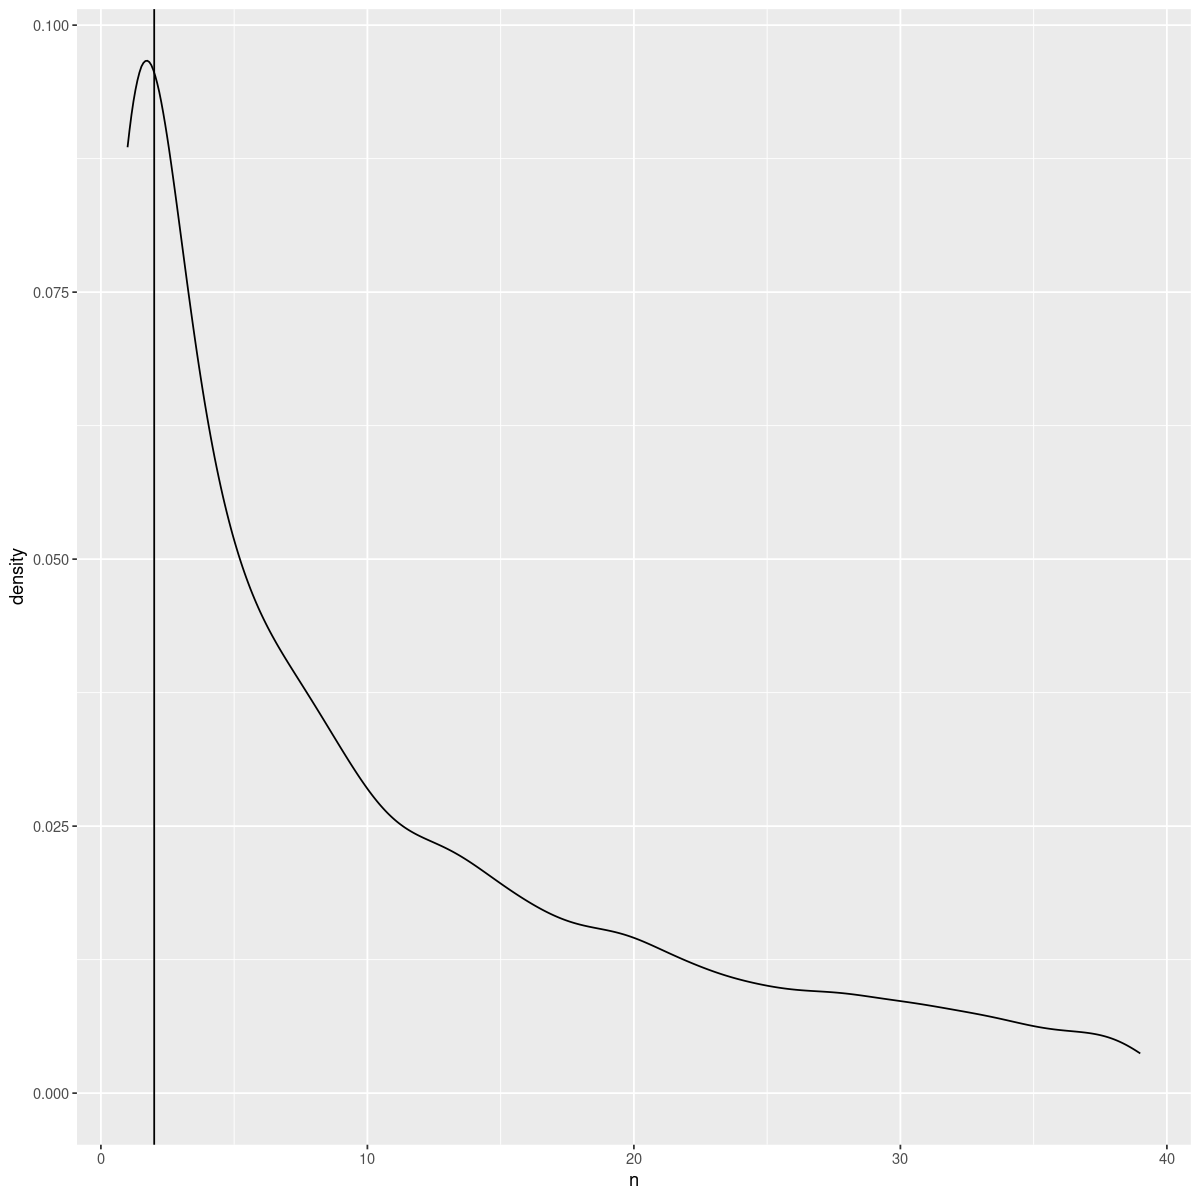

In [143]:
eQTLori%>%group_by(molecular_trait_id,cs_order)%>%count%>%filter(n<40)%>%ggplot()+geom_density(aes(x = n))+geom_vline(aes(xintercept = 2))

In [138]:
eQTLori%>%group_by(molecular_trait_id,cs_order)%>%count%>%pull(n)%>%quantile(c(0,0.05,0.2,0.25,0.5,0.75,1))

0%   5%  20%  25%  50%  75% 100% 
   1    1    2    3    9   26  215

In [28]:
eQTL = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/eqtl.all_variants_size_1.tsv","\t")
h16 =  read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/haQTL_pure_completed_unlimited_16_size_1.tsv","\t")
m16 =  read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/mQTL_pure_completed_unlimited_16_size_1.tsv","\t")
pQTL = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/pqtl.all_variants_size_1.tsv","\t")


Rows: 2471 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): variants, ref, alt, cs_order, log10_base_factor, molecular_trait_id
dbl (10): snps_index, chromosome, position, pip, posterior_mean, posterior_s...
lgl  (1): cs_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 823 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref, alt, molecular_trait_id
dbl (11): snps_index, chromosome, position, cs_order, pip, finemapped_region...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4623 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref, alt

In [207]:
gene_name = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/../reference_data/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.region_list")


Rows: 60726 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): #chr, gene_id, gene_name
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [218]:
eQTLori%>%colnames()

[1] "variants"                "snps_index"             
 [3] "chromosome"              "position"               
 [5] "ref"                     "alt"                    
 [7] "cs_order"                "cs_id"                  
 [9] "log10_base_factor"       "pip"                    
[11] "posterior_mean"          "posterior_sd"           
[13] "z"                       "molecular_trait_id"     
[15] "finemapped_region_start" "finemapped_region_end"  
[17] "cs_size"

In [222]:
eQTLori%>%filter(finemapped_region_start == 153120000  )%>%count(molecular_trait_id,cs_order)

molecular_trait_id,cs_order,n
<chr>,<chr>,<int>
ENSG00000109654,c(L1 = 2),10
ENSG00000109654,c(L2 = 3),22
ENSG00000109654,c(L3 = 1),6
ENSG00000121210,c(L1 = 1),15
ENSG00000250771,c(L1 = 1),17
ENSG00000288637,c(L1 = 1),10


In [205]:
m16%>%filter(molecular_trait_id == "tad435")

variants,snps_index,chromosome,position,ref,alt,cs_order,pip,molecular_trait_id,finemapped_region_start,finemapped_region_end,purity,is_dummy,effect_peak_pos,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr4:153210363_G_C,315,4,153210363,G,C,6,0.9809427,tad435,153120000,153680000,1,0,153292589,1
chr4:153453257_T_G,899,4,153453257,T,G,5,0.9530426,tad435,153120000,153680000,1,0,153509803,1
chr4:153498419_T_A,993,4,153498419,T,A,2,0.9748420,tad435,153120000,153680000,1,0,153597239,1
chr4:153593695_T_C,1102,4,153593695,T,C,1,0.9530417,tad435,153120000,153680000,1,0,153643187,1
chr4:153594426_AC_A,1110,4,153594426,AC,A,3,1.0000000,tad435,153120000,153680000,1,0,153643187,1


In [29]:
joint = inner_join(h16,m16, by = "variants")

shared_cs_map = joint%>%count(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y)

In [30]:
id = map(list(eQTL,h16,m16,pQTL),~.x%>%mutate(id = paste0(molecular_trait_id,"_",cs_order))%>%pull(id))

In [31]:
id_str = id%>%unlist()

In [32]:
length(id%>%unlist)

[1] 8300

In [33]:
length(id_str)

[1] 8300

In [34]:
m16_effect = m16%>%count(molecular_trait_id)%>%select(-n)%>%mutate(type = "mQTL", effect_tibble_path = paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_meQTL_effect/meQTL.yuqi_mqtl.",molecular_trait_id,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv") )

In [35]:
m16_effect = m16_effect%>%mutate(effect = map(effect_tibble_path, ~read_delim(.x,show_col_types=FALSE)))

In [36]:
ha16_effect = h16%>%count(molecular_trait_id)%>%select(-n)%>%mutate(type = "haQTL", effect_tibble_path = paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_haQTL_effect/haQTL.rosmap_haqtl.",molecular_trait_id,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv") )

In [37]:
ha16_effect = ha16_effect%>%mutate(effect = map(effect_tibble_path, ~read_delim(.x,show_col_types=FALSE)))

In [38]:
list(methylation_effect = m16_effect , histone_acylation_effect =  ha16_effect )%>%saveRDS("all_functional_effect_16.rds")

In [39]:
combind_cs = combind_cs%>%mutate(id = paste0(id = paste0(molecular_trait_id,"_",cs_order) ))%>%filter(id %in% id_str)

In [40]:
combind_cs = combind_cs%>%filter(id %in% id_str )

In [41]:
combind_cs%>%dplyr::select(haQTL,mQTL,eQTL,pQTL)%>%as.data.frame%>%write_delim("2_upset_superfine.tsv","\t")

Adding missing grouping variables: `molecular_trait_id`


In [68]:
a = readRDS("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/updated_16_1/haQTL_mQTL_eQTL_pQTL.UpSetR_eQTL_cs.rds")

In [127]:
eQTL%>%nrow()

[1] 2471

Adding missing grouping variables: `molecular_trait_id`


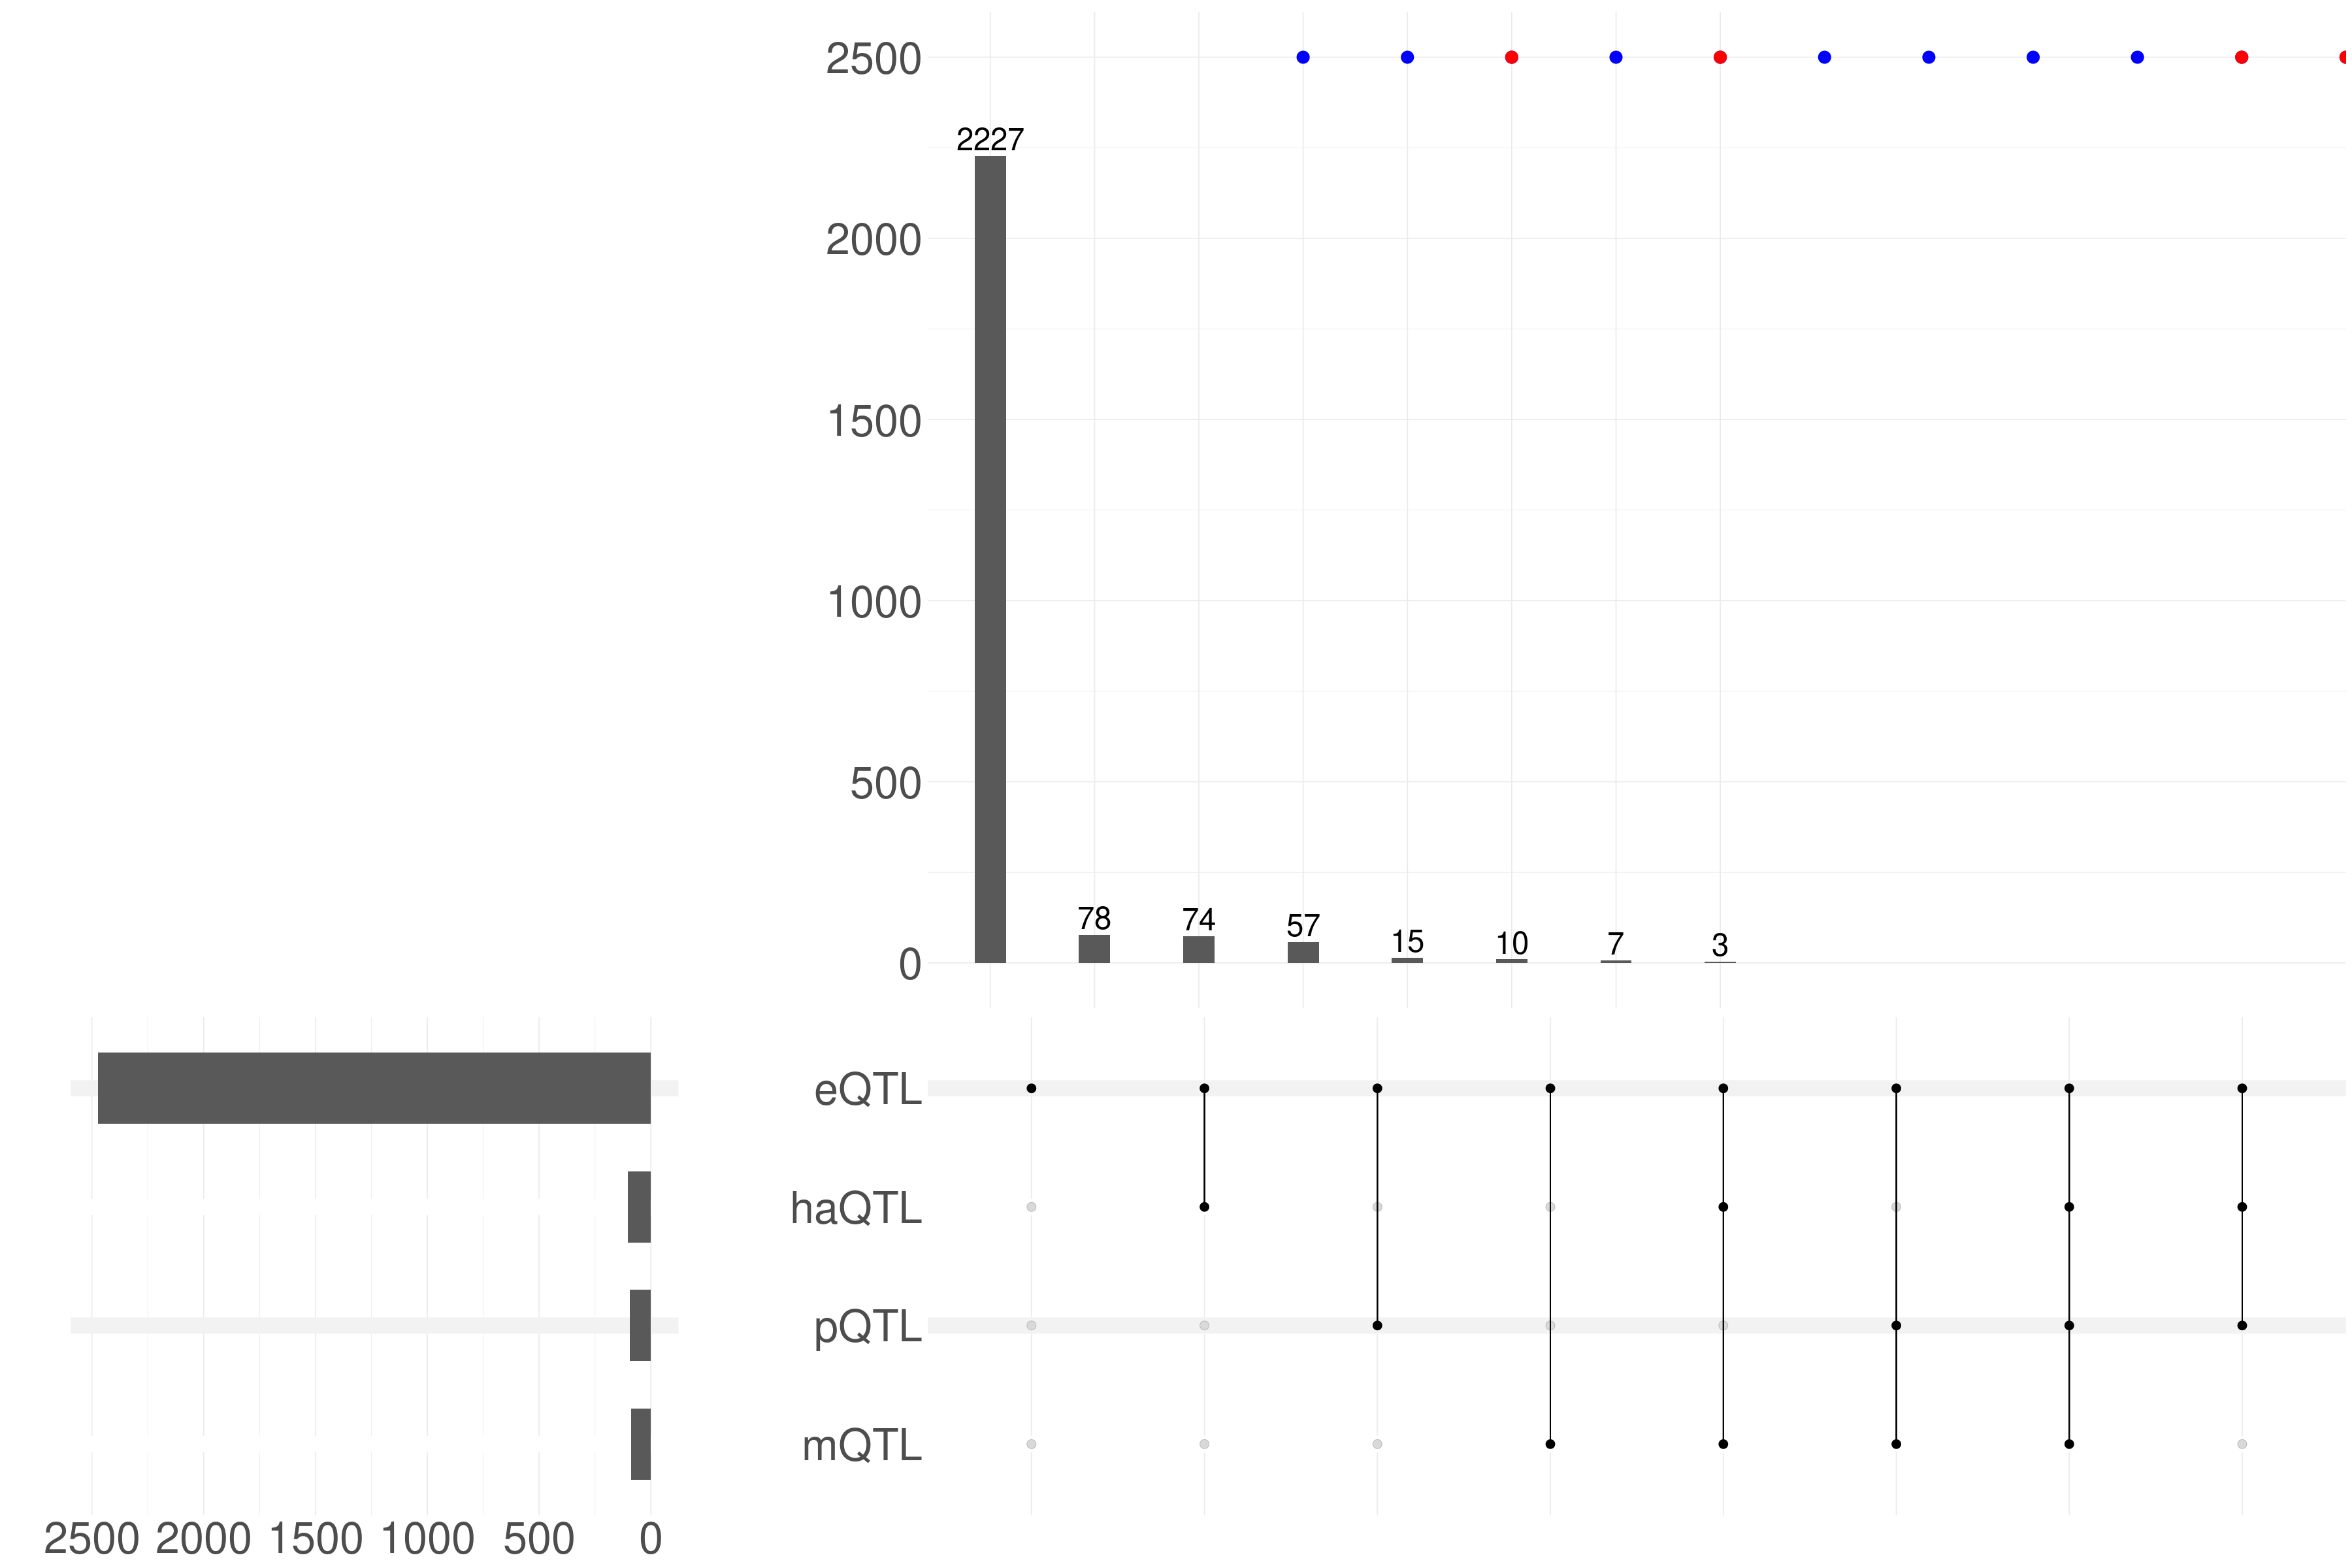

In [70]:
upset(a[[1]]%>%dplyr::select(haQTL,mQTL,eQTL,pQTL),intersect = c("mQTL","haQTL","eQTL","pQTL"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 10)  )+ylab("")+annotate("point", y = 2500, x = c(4:14), color = "blue", size = 5  ) + annotate("point", y = 2500, x = c(6,8,13,14), color = "red", size = 5  )       ) ,
          themes=upset_default_themes(plot.margin=unit(c(0,0,0,20),"mm"),axis.text=element_text(size=40), axis.title.x = element_blank() ,text=element_text(size=40) )     ,  
          min_degree = 1)

In [71]:
unique(c(pQTL$variants,eQTL$variants,h16$variants,m16$variants))-> upset_snp

In [64]:
rbind(pQTL%>%count(variants,molecular_trait_id),
     eQTL%>%count(variants,molecular_trait_id),
     h16%>%count(variants,molecular_trait_id),
          m16%>%count(variants,molecular_trait_id)
     )->upset_snp_pheno

In [49]:
length(upset_snp)

[1] 7825

In [74]:
tibble(variants = upset_snp)%>%mutate(pQTL = variants%in%  pQTL$variants , 
                           eQTL = variants%in%  eQTL$variants ,
                          haQTL = variants%in%  h16$variants,
                            mQTL = variants%in%  m16$variants)-> snp_upset_df

In [78]:
colSums(snp_upset_df%>%select(eQTL,pQTL,haQTL,mQTL))

eQTL  pQTL haQTL  mQTL 
 2265   374   823  4623

##### eQTL%>%filter(variants %in% ((m16))$variants)%>%count(variants)%>%count(n)

In [97]:
rbind(eQTL%>%filter(variants %in% ((h16))$variants)%>%count(variants)%>%count(n)%>%t(),
eQTL%>%filter(variants %in% ((m16))$variants)%>%count(variants)%>%count(n)%>%t())

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.


ERROR: Error in rbind(eQTL %>% filter(variants %in% ((h16))$variants) %>% count(variants) %>% : number of columns of matrices must match (see arg 2)


In [100]:
e = left_join(eQTL%>%filter(variants %in% ((h16))$variants)%>%count(variants)%>%count(n),eQTL%>%filter(variants %in% ((m16))$variants)%>%count(variants)%>%count(n), by ="n")

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.


In [116]:
e%>%t()%>%as_tibble%>%`colnames<-`(e$n)->e

In [118]:
e = e[2:3,]

In [124]:
e%>%mutate(">5" = c(2,0)%>%as.integer)%>%select(-c("7","10"))%>%mutate(type = c("haQTL","mQTL"))%>%select(type , everything())

type,1,2,3,4,5,>5
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
haQTL,49,8,4,1,1,2
mQTL,59,6,3,1,1,0


In [157]:
plot_recipe_temp = upset_snp_pheno%>%mutate(pQTL = variants%in%  pQTL$variants , 
                           eQTL = variants%in%  eQTL$variants ,
                          haQTL = variants%in%  h16$variants,
                            mQTL = variants%in%  m16$variants)%>%filter(pQTL,eQTL,haQTL,mQTL)%>%arrange(variants)

In [160]:
plot_recipe_temp = plot_recipe_temp%>%mutate(type = c("pQTL","eQTL","haQTL","mQTL","pQTL","eQTL","haQTL","mQTL","pQTL","eQTL","haQTL","mQTL","pQTL","eQTL","eQTL","eQTL","eQTL","haQTL","mQTL") )

In [168]:
plot_recipe_temp = plot_recipe_temp%>%mutate(path = case_when(type == "pQTL"  ~  paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/pqtl_finemapping/output/susie_per_ID_tad/cache/result/demo.pqtl.",molecular_trait_id,".unisusie.fit.variant.tsv"),
                                    type == "eQTL" ~  paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.",molecular_trait_id,".unisusie.fit.variant.tsv"),
                                    type == "haQTL"  ~ paste0("output/rerun/haQTL/fsusie.rosmap_haqtl.",molecular_trait_id,".uni_Fsusie.mixture_normal_per_scale.variant.tsv"),
                                    type == "mQTL"  ~ paste0("output/rerun/mQTL/fsusie.yuqi_mqtl.",molecular_trait_id,".uni_Fsusie.mixture_normal_per_scale.variant.tsv")
                                          ))%>%select(-c(pQTL,eQTL,haQTL,mQTL,n))

In [175]:
plot_recipe_temp%>%select(-molecular_trait_id)%>%pivot_wider(names_from = type , values_from = path)%>%unnest(eQTL)

Warning message:
“Values from `path` are not uniquely identified; output will contain list-cols.
• Use `values_fn = list` to suppress this warning.
• Use `values_fn = {summary_fun}` to summarise duplicates.
• Use the following dplyr code to identify duplicates.
  {data} %>%
  dplyr::group_by(variants, type) %>%
  dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
  dplyr::filter(n > 1L)”


variants,pQTL,eQTL,haQTL,mQTL
<chr>,<list>,<chr>,<list>,<list>
chr1:161038745_C_G,/mnt/vast/hpc/csg/molecular_phenotype_calling/pqtl_finemapping/output/susie_per_ID_tad/cache/result/demo.pqtl.1_TSTD1_Q8NFU3.unisusie.fit.variant.tsv,/mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000215845.unisusie.fit.variant.tsv,output/rerun/haQTL/fsusie.rosmap_haqtl.tad75.uni_Fsusie.mixture_normal_per_scale.variant.tsv,output/rerun/mQTL/fsusie.yuqi_mqtl.tad75.uni_Fsusie.mixture_normal_per_scale.variant.tsv
chr22:36239710_G_A,/mnt/vast/hpc/csg/molecular_phenotype_calling/pqtl_finemapping/output/susie_per_ID_tad/cache/result/demo.pqtl.22_APOL2_Q9BQE5.unisusie.fit.variant.tsv,/mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000128335.unisusie.fit.variant.tsv,output/rerun/haQTL/fsusie.rosmap_haqtl.tad1411.uni_Fsusie.mixture_normal_per_scale.variant.tsv,output/rerun/mQTL/fsusie.yuqi_mqtl.tad1411.uni_Fsusie.mixture_normal_per_scale.variant.tsv
chr2:112467578_A_G,/mnt/vast/hpc/csg/molecular_phenotype_calling/pqtl_finemapping/output/susie_per_ID_tad/cache/result/demo.pqtl.2_FBLN7_Q53RD9.unisusie.fit.variant.tsv,/mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000144161.unisusie.fit.variant.tsv,output/rerun/haQTL/fsusie.rosmap_haqtl.tad185.uni_Fsusie.mixture_normal_per_scale.variant.tsv,output/rerun/mQTL/fsusie.yuqi_mqtl.tad185.uni_Fsusie.mixture_normal_per_scale.variant.tsv
chr4:138309666_C_A,/mnt/vast/hpc/csg/molecular_phenotype_calling/pqtl_finemapping/output/susie_per_ID_tad/cache/result/demo.pqtl.4_SLC7A11_Q9UPY5.unisusie.fit.variant.tsv,/mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000151012.unisusie.fit.variant.tsv,output/rerun/haQTL/fsusie.rosmap_haqtl.tad426.uni_Fsusie.mixture_normal_per_scale.variant.tsv,output/rerun/mQTL/fsusie.yuqi_mqtl.tad426.uni_Fsusie.mixture_normal_per_scale.variant.tsv
chr4:138309666_C_A,/mnt/vast/hpc/csg/molecular_phenotype_calling/pqtl_finemapping/output/susie_per_ID_tad/cache/result/demo.pqtl.4_SLC7A11_Q9UPY5.unisusie.fit.variant.tsv,/mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000248795.unisusie.fit.variant.tsv,output/rerun/haQTL/fsusie.rosmap_haqtl.tad426.uni_Fsusie.mixture_normal_per_scale.variant.tsv,output/rerun/mQTL/fsusie.yuqi_mqtl.tad426.uni_Fsusie.mixture_normal_per_scale.variant.tsv
chr4:138309666_C_A,/mnt/vast/hpc/csg/molecular_phenotype_calling/pqtl_finemapping/output/susie_per_ID_tad/cache/result/demo.pqtl.4_SLC7A11_Q9UPY5.unisusie.fit.variant.tsv,/mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000249381.unisusie.fit.variant.tsv,output/rerun/haQTL/fsusie.rosmap_haqtl.tad426.uni_Fsusie.mixture_normal_per_scale.variant.tsv,output/rerun/mQTL/fsusie.yuqi_mqtl.tad426.uni_Fsusie.mixture_normal_per_scale.variant.tsv
chr4:138309666_C_A,/mnt/vast/hpc/csg/molecular_phenotype_calling/pqtl_finemapping/output/susie_per_ID_tad/cache/result/demo.pqtl.4_SLC7A11_Q9UPY5.unisusie.fit.variant.tsv,/mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000251372.unisusie.fit.variant.tsv,output/rerun/haQTL/fsusie.rosmap_haqtl.tad426.uni_Fsusie.mixture_normal_per_scale.variant.tsv,output/rerun/mQTL/fsusie.yuqi_mqtl.tad426.uni_Fsusie.mixture_normal_per_scale.variant.tsv


In [200]:
plot_recipe_temp%>%select(-molecular_trait_id)%>%pivot_wider(names_from = type , values_from = path)%>%filter(variants =="chr4:138309666_C_A" )%>%select(-variants)%>%select(eQTL)

Warning message:
“Values from `path` are not uniquely identified; output will contain list-cols.
• Use `values_fn = list` to suppress this warning.
• Use `values_fn = {summary_fun}` to summarise duplicates.
• Use the following dplyr code to identify duplicates.
  {data} %>%
  dplyr::group_by(variants, type) %>%
  dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
  dplyr::filter(n > 1L)”


eQTL
<list>
"/mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000151012.unisusie.fit.variant.tsv, /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000248795.unisusie.fit.variant.tsv, /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000249381.unisusie.fit.variant.tsv, /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000251372.unisusie.fit.variant.tsv"


In [199]:
plot_recipe_temp%>%select(-molecular_trait_id)%>%pivot_wider(names_from = type , values_from = path)%>%filter(variants =="chr4:138309666_C_A" )%>%select(-variants)%>%select(eQTL)%>%mutate_all(as.character)%>%
write_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/plot_reciepe_426.tsv","\t")

Warning message:
“Values from `path` are not uniquely identified; output will contain list-cols.
• Use `values_fn = list` to suppress this warning.
• Use `values_fn = {summary_fun}` to summarise duplicates.
• Use the following dplyr code to identify duplicates.
  {data} %>%
  dplyr::group_by(variants, type) %>%
  dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
  dplyr::filter(n > 1L)”


In [182]:
plot_recipe_temp%>%select(-molecular_trait_id)%>%pivot_wider(names_from = type , values_from = path)%>%filter(variants =="chr4:138309666_C_A" )%>%select(-variants)%>%mutate_all(as.character)%>%
write_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/plot_reciepe_1_3.tsv","\t")

Warning message:
“Values from `path` are not uniquely identified; output will contain list-cols.
• Use `values_fn = list` to suppress this warning.
• Use `values_fn = {summary_fun}` to summarise duplicates.
• Use the following dplyr code to identify duplicates.
  {data} %>%
  dplyr::group_by(variants, type) %>%
  dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
  dplyr::filter(n > 1L)”


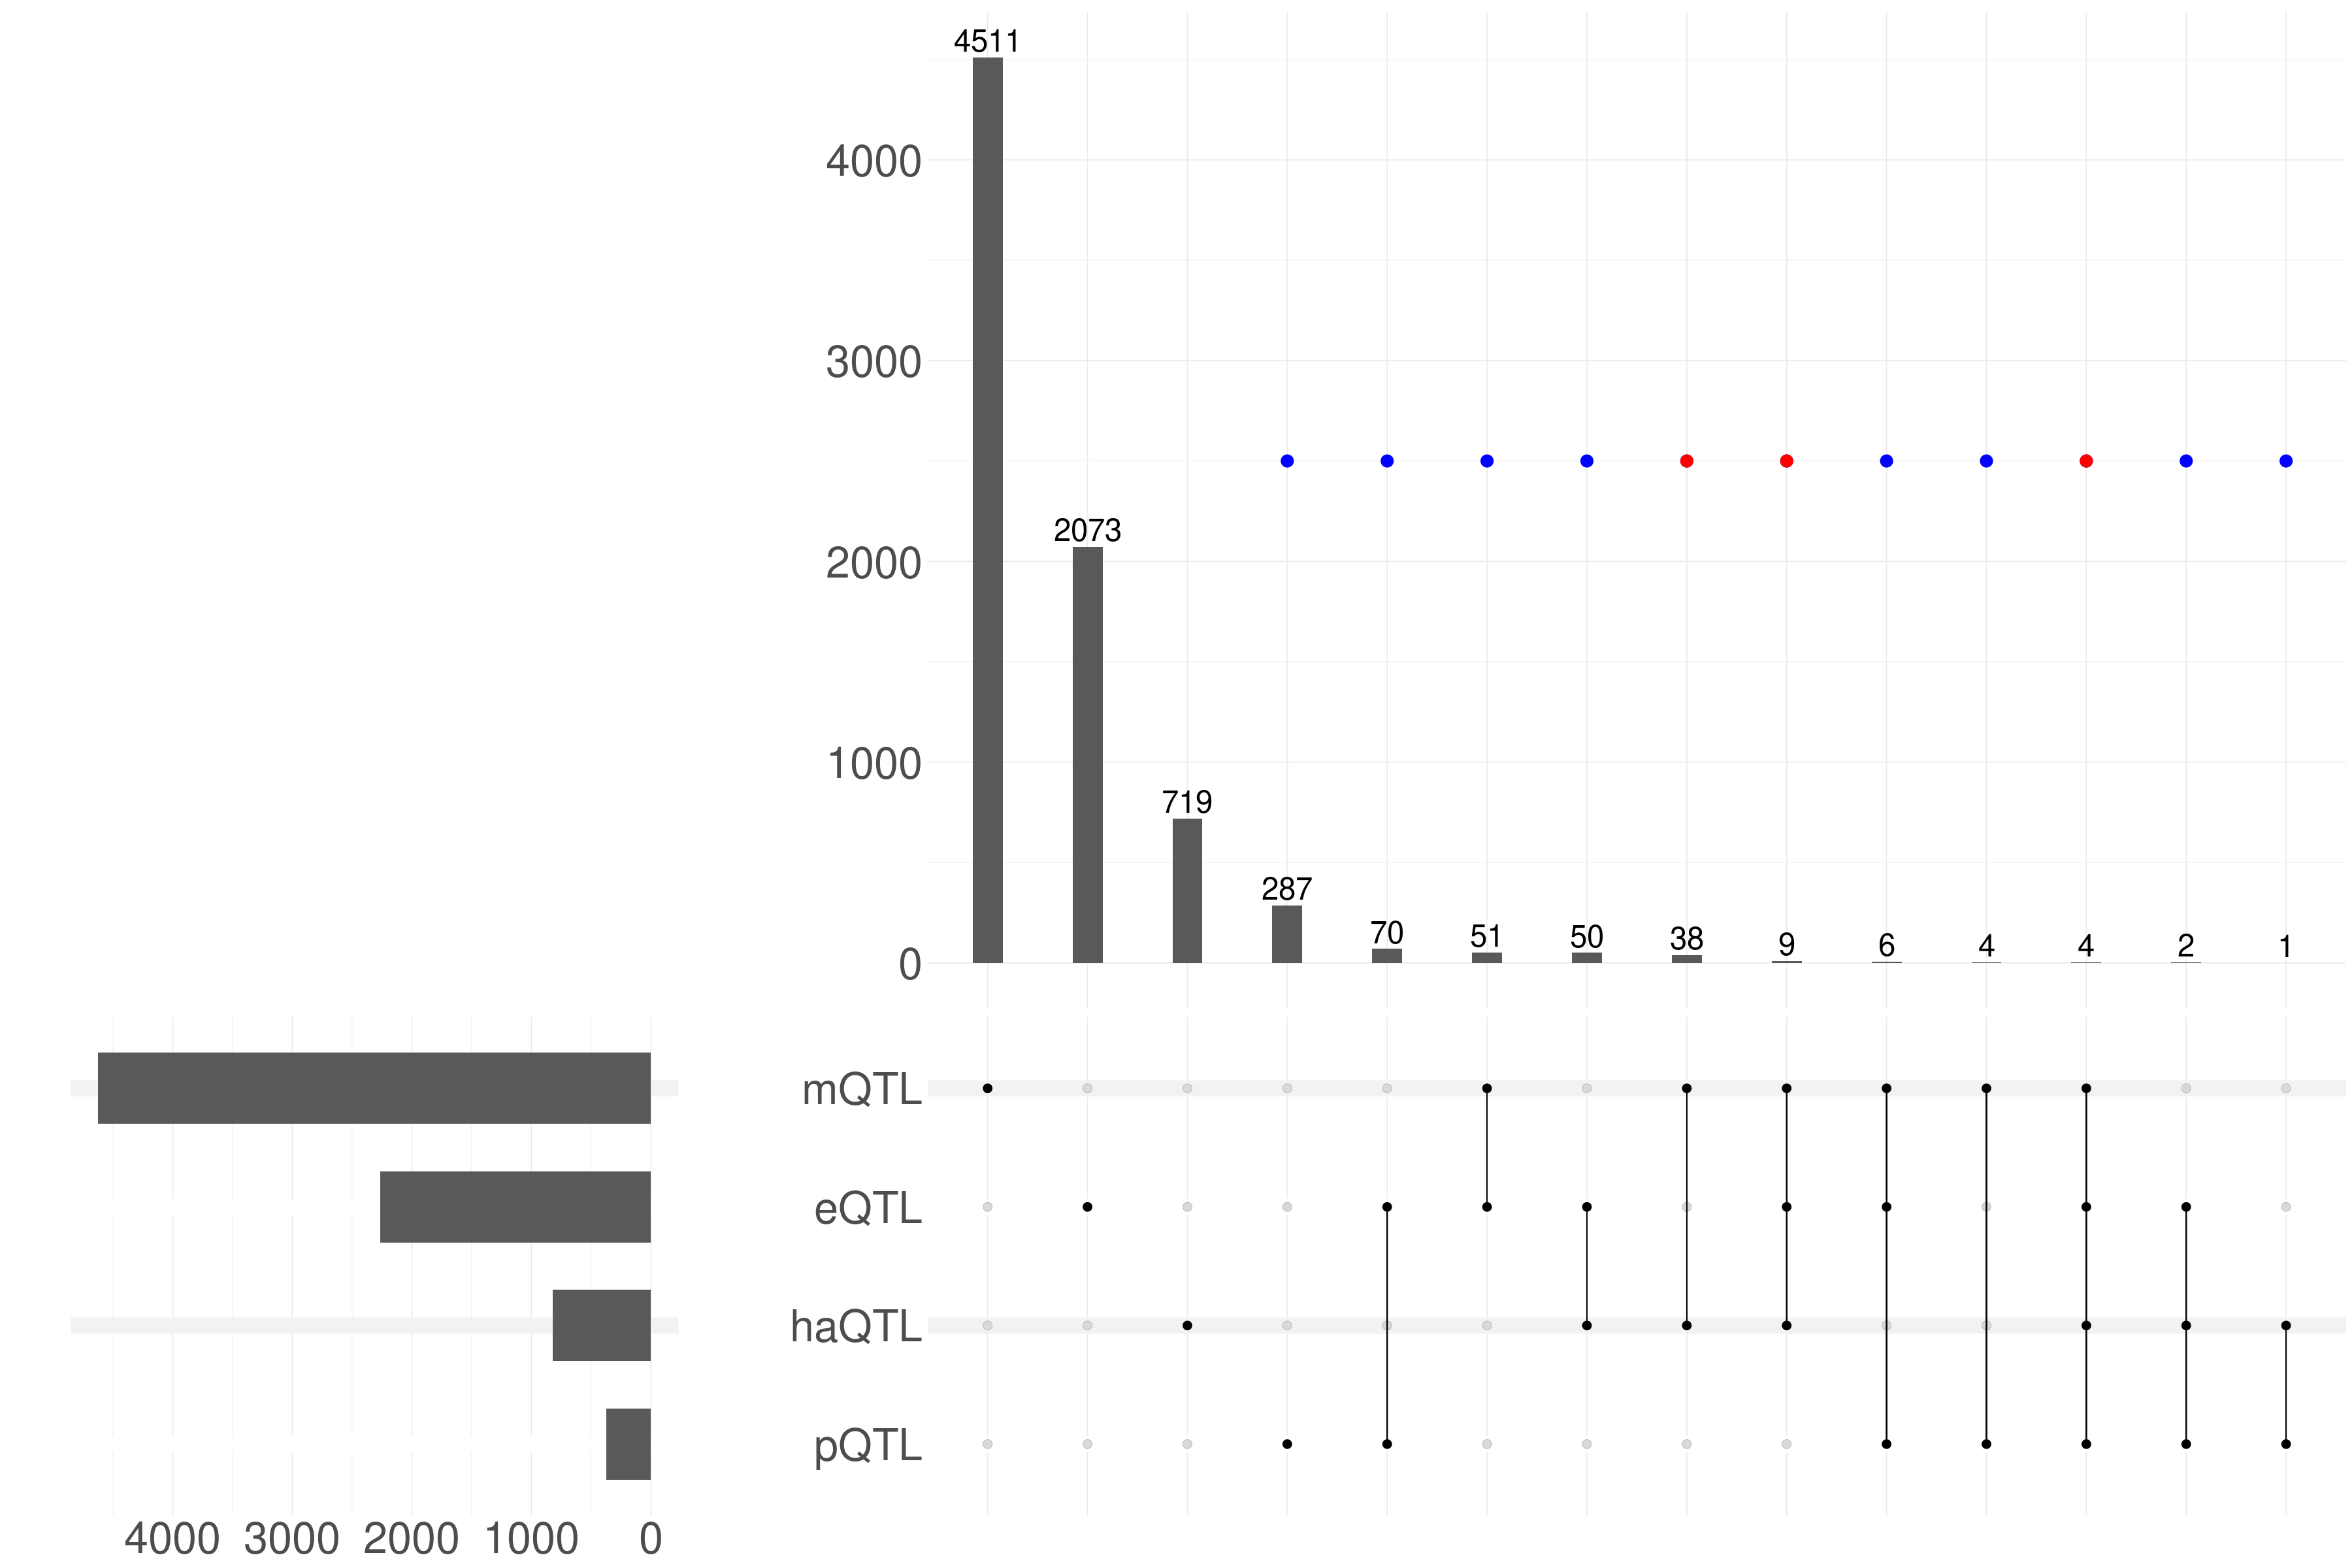

In [147]:
upset(snp_upset_df,intersect = c("mQTL","haQTL","eQTL","pQTL"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 10)  )+ylab("")+annotate("point", y = 2500, x = c(4:14), color = "blue", size = 5  ) + annotate("point", y = 2500, x = c(8,9,12), color = "red", size = 5  )       ) ,
          themes=upset_default_themes(plot.margin=unit(c(0,0,0,20),"mm"),axis.text=element_text(size=40), axis.title.x = element_blank() ,text=element_text(size=40) )     ,  
          min_degree = 1)

In [144]:
snp_upset_df%>%filter(mQTL,pQTL,haQTL,eQTL)

variants,pQTL,eQTL,haQTL,mQTL
<chr>,<lgl>,<lgl>,<lgl>,<lgl>
chr1:161038745_C_G,TRUE,TRUE,TRUE,TRUE
chr22:36239710_G_A,TRUE,TRUE,TRUE,TRUE
chr2:112467578_A_G,TRUE,TRUE,TRUE,TRUE
chr4:138309666_C_A,TRUE,TRUE,TRUE,TRUE


In [149]:
left_join(h16%>%filter(variants %in% (snp_upset_df%>%filter(mQTL,pQTL,haQTL,eQTL)%>%pull(variants)) )

variants,snps_index,chromosome,position,ref,alt,cs_order,pip,molecular_trait_id,finemapped_region_start,finemapped_region_end,purity,is_dummy,effect_peak_pos,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr22:36239710_G_A,2350,22,36239710,G,A,1,1.000000,tad1411,35320000,36480000,1,0,36027592,1
chr2:112467578_A_G,1386,2,112467578,A,G,1,1.000000,tad185,111840000,113400000,1,0,112552565,1
chr4:138309666_C_A,4080,4,138309666,C,A,2,0.999999,tad426,137000000,139000000,1,0,138436858,1
chr1:161038745_C_G,2427,1,161038745,C,G,1,1.000000,tad75,160040000,161400000,1,0,160843026,1


In [184]:
joint_temp = h16%>%filter(variants %in% (snp_upset_df%>%filter(mQTL,pQTL,haQTL,eQTL)%>%pull(variants)))

In [186]:
inner_join(joint_temp,m16, by = "variants")%>%inner_join(eQTL, by = "variants")%>%inner_join(pQTL, by = "variants")-> comp_temp

In [193]:
(comp_temp)%>%select(variants,z.x,z.y,molecular_trait_id.x)

variants,z.x,z.y,molecular_trait_id.x
<chr>,<dbl>,<dbl>,<chr>
chr22:36239710_G_A,-5.448847e-01,-20.764485,tad1411
chr2:112467578_A_G,8.191762e-06,-5.319736,tad185
chr4:138309666_C_A,-9.649874e-05,-11.626679,tad426
chr4:138309666_C_A,-2.822841e-04,-11.626679,tad426
chr4:138309666_C_A,-4.972931e-07,-11.626679,tad426
chr4:138309666_C_A,2.345790e-04,-11.626679,tad426
chr1:161038745_C_G,-1.429793e-03,13.937450,tad75


In [191]:
pQTL

variants,snps_index,chromosome,position,ref,alt,cs_order,cs_id,log10_base_factor,pip,posterior_mean,posterior_sd,z,molecular_trait_id,finemapped_region_start,finemapped_region_end,type,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr10:74406526_TAAGAAGAAGAAGAAG_GAAGAAGAAGAAGAAG,1061,10,74406526,TAAGAAGAAGAAGAAG,GAAGAAGAAGAAGAAG,c(L2 = 1),NA,5.98635652103284;14.7318773573367;-0.18517730701282;-0.175024235093459;-0.162057987672268;-0.151694562202495;-0.1469977408087;-0.14895340350865;-0.157152387801089;-0.170461352151368,0.9697906,-0.2182311,0.05457994,-3.998376,10_ADK_P55263,73151201,74151201,pQTL,1
chr10:70121102_A_G,5457,10,70121102,A,G,c(L1 = 1),NA,48.5221305806593;-0.370037550446846;-0.289748561045585;-0.0545820635097889;-0.0467770950926396;-0.0369477988618776;-0.0283541252387298;-0.0214353474903617;-0.0160285235122846;-0.0118709517376203,1.0000000,-0.4123881,0.04089938,-10.082991,10_AIFM2_Q9BRQ8,69132933,70132933,pQTL,1
chr10:99387935_G_A,3418,10,99387935,G,A,c(L1 = 1),NA,57.1354107844527;-1.50503089956685;-0.216628973395377;-0.151844291913524;-0.116886612624902;-0.0894595810032355;-0.0679190458184302;-0.0510384747883479;-0.0379013768015324;-0.0277865951636018,1.0000000,-0.4360546,0.03996852,-10.909950,10_CNNM1_Q9NRU3,98329355,99329355,pQTL,1
chr10:12090927_G_C,230,10,12090927,G,C,c(L1 = 1),NA,526.106141737481;26.3597127239419;0;0;0;0;0;0;0;0,0.9903277,-0.9197533,0.09522936,-9.658295,10_DHTKD1_Q96HY7,11068953,12068953,pQTL,1
chr10:104286204_GT_G,1205,10,104286204,GT,G,c(L6 = 1),NA,0;0;0;0;2557.09377256606;2300.17501615657;0;0;0;0,1.0000000,1.9605144,0.02887864,67.888038,10_GSTO1_P78417,103235355,104235355,pQTL,1
chr10:70353941_G_A,6058,10,70353941,G,A,c(L1 = 1),NA,23.3298013513088;-0.281877105404877;-0.283030367899774;-0.285246552502186;-0.28776084269106;-0.29000870588499;-0.291613952578271;-0.292359771978118;-0.292152559511383;-0.290986656987866,0.9834550,0.2963723,0.05695680,5.203458,10_LRRC20_Q8TCA0,69382649,70382649,pQTL,1
chr10:129467281_C_T,4046,10,129467281,C,T,c(L3 = 1),NA,-2.60532662024268;0.90188112292937;47.7351797664546;-1.38448985451095;-0.466952439106433;-0.465922458698235;-0.466394080268642;-0.467939048363375;-0.469681367750269;-0.470676674445247,1.0000000,-0.3202874,0.03202083,-10.002470,10_MGMT_P16455,128467189,129467189,pQTL,1
chr10:3138035_T_C,226,10,3138035,T,C,c(L2 = 2),NA,13.0190445648242;94.8645528676785;-1.91603682241728;-1.71881435849778;1.01534622115613;-0.234273465405014;-0.234252608614127;-0.234289880193796;-0.234360057387738;-0.234421430562486,0.9724885,-0.3638120,0.06666242,-5.457528,10_PITRM1_Q5JRX3,2172840,3172840,pQTL,1
chr10:3138618_C_G,234,10,3138618,C,G,c(L5 = 4),NA,1.46433309641452;12.5563277356372;-1.93399842945843;-1.52460234075031;17.0798355663863;-0.22964336067237;-0.229622775456165;-0.229659305004858;-0.229728165088385;-0.229788371229133,0.9941731,0.1620714,0.02920234,5.549943,10_PITRM1_Q5JRX3,2172840,3172840,pQTL,1


In [150]:
eQTL%>%filter(variants %in% (snp_upset_df%>%filter(mQTL,pQTL,haQTL,eQTL)%>%pull(variants)) )

variants,snps_index,chromosome,position,ref,alt,cs_order,cs_id,log10_base_factor,pip,posterior_mean,posterior_sd,z,molecular_trait_id,finemapped_region_start,finemapped_region_end,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr22:36239710_G_A,2350,22,36239710,G,A,c(L1 = 1),NA,309.968276420506;-0.574374425093705;-0.606561408052919;-0.615820785061936;-0.60847560045862;-0.595093156071101;-0.581081106346435;-0.568546019462219;-0.558133797371841;-0.549782974100359,1.0000000,-1.407296e-02,0.02582740,-5.448847e-01,ENSG00000128335,35320000,36480000,1
chr2:112467578_A_G,1386,2,112467578,A,G,c(L1 = 1),NA,21.6197808917311;0.456343914234788;-1.18889246945609;0;0;0;0;0;0;0,0.9895265,3.182966e-07,0.03885569,8.191762e-06,ENSG00000144161,111840000,113400000,1
chr4:138309666_C_A,4080,4,138309666,C,A,c(L1 = 1),NA,50.0227105388102;-0.949668555648171;-0.0172993648159601;-0.0138967503702769;-0.0103533247961876;-0.00732707840452118;-0.00499392744314431;-0.00330688668702894;-0.00214001397508623;-0.00135926320857793,0.9999993,-3.120395e-06,0.03233613,-9.649874e-05,ENSG00000151012,137000000,139000000,1
chr1:161038745_C_G,2427,1,161038745,C,G,c(L1 = 1),NA,165.244749178263;0.419146973063378;0;0;0;0;0;0;0;0,1.0000000,-3.982506e-05,0.02785371,-1.429793e-03,ENSG00000215845,160040000,161400000,1
chr4:138309666_C_A,4080,4,138309666,C,A,c(L1 = 1),NA,101.765542781793;-2.04394833716533;-0.965862580871068;-0.298515816830391;-0.305213440955747;-0.294500262430753;-0.266816160842778;-0.222160426675804;-0.157258287634154;-0.072483850978402,1.0000000,-8.307188e-06,0.02942847,-2.822841e-04,ENSG00000248795,137000000,139000000,1
chr4:138309666_C_A,4080,4,138309666,C,A,c(L1 = 1),NA,201.105617628266;-1.60653557328848;0;0;0;0;0;0;0;0,1.0000000,-1.385362e-08,0.02785805,-4.972931e-07,ENSG00000249381,137000000,139000000,1
chr4:138309666_C_A,4080,4,138309666,C,A,c(L1 = 1),NA,936.518760227418;-0.467713117620696;-0.474545056144778;-0.483656198075431;-0.490940954585679;-0.494491481043525;-0.494262919967151;-0.491070655814061;-0.485845051575648;-0.479326519335917,1.0000000,4.490118e-06,0.01914117,2.345790e-04,ENSG00000251372,137000000,139000000,1


In [ ]:
ENSG00000151012	chr4:138309666_C_A
ENSG00000215845	chr1:161038745_C_G
ENSG00000248795	chr4:138309666_C_A
ENSG00000249381	chr4:138309666_C_A
ENSG00000251372	chr4:138309666_C_A


In [204]:
eQTL%>%filter(variants %in% (snp_upset_df%>%filter(mQTL,pQTL,haQTL,eQTL)%>%pull(variants)) )%>%select(molecular_trait_id,variants)

molecular_trait_id,variants
<chr>,<chr>
ENSG00000128335,chr22:36239710_G_A
ENSG00000144161,chr2:112467578_A_G
ENSG00000151012,chr4:138309666_C_A
ENSG00000215845,chr1:161038745_C_G
ENSG00000248795,chr4:138309666_C_A
ENSG00000249381,chr4:138309666_C_A
ENSG00000251372,chr4:138309666_C_A


In [ ]:
meQTL   haQTL   eQTL    eQTL    eQTL
output/rerun/mQTL/fsusie.yuqi_mqtl.tad1182.uni_Fsusie.mixture_normal_per_scale.variant.tsv      output/rerun/haQTL/fsusie.rosmap_haqtl.tad1182.uni_Fsusie.mixture_normal_per_scale.variant.tsv  /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000184984.unisusie.fit.variant.tsv    /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000259505.unisusie.fit.variant.tsv    ../eqtl/output/susie_per_gene_tad/demo.ENSG00000248905.unisusie.fit.variant.tsv
output/rerun/mQTL/fsusie.yuqi_mqtl.tad1182.uni_Fsusie.mixture_normal_per_scale.variant.tsv      output/rerun/haQTL/fsusie.rosmap_haqtl.tad1182.uni_Fsusie.mixture_normal_per_scale.variant.tsv  /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000184984.unisusie.fit.variant.tsv    /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000259505.unisusie.fit.variant.tsv    ../eqtl/output/susie_per_gene_tad/demo.ENSG00000248905.unisusie.fit.variant.tsv
output/rerun/mQTL/fsusie.yuqi_mqtl.tad1182.uni_Fsusie.mixture_normal_per_scale.variant.tsv      output/rerun/haQTL/fsusie.rosmap_haqtl.tad1182.uni_Fsusie.mixture_normal_per_scale.variant.tsv  /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000184984.unisusie.fit.variant.tsv    /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl//output/susie_per_gene_tad//demo.ENSG00000259505.unisusie.fit.variant.tsv    ../eqtl/output/susie_per_gene_tad/demo.ENSG00000248905.unisusie.fit.variant.tsv

In [44]:
119+19+51

[1] 189

## Redo shared TSS

In [108]:
gene_name = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/../reference_data/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.region_list")


Rows: 60726 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): #chr, gene_id, gene_name
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [95]:
haQTL_affected_region = readr::read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping//all.haQTL.affected_region.tsv","\t")
mQTL_affected_region = readr::read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping//all.mQTL.affected_region.tsv","\t")


Rows: 14720 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): analysis, chr, molecular_trait_id
dbl (3): CS, Start, End
lgl (1): purity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 89578 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): analysis, chr, molecular_trait_id
dbl (3): CS, Start, End
lgl (1): purity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [96]:
joint = inner_join(h16,m16, by = "variants")
shared_cs_map = joint%>%count(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y)

In [97]:
shared_cs_map = joint%>%count(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y)

In [98]:
haQTL_shared_affected_region = inner_join(shared_cs_map,haQTL_affected_region,by = c("molecular_trait_id.x" =  "molecular_trait_id", "cs_order.x" = "CS" ))
meQTL_shared_affected_region = inner_join(shared_cs_map,mQTL_affected_region,by = c("molecular_trait_id.y" =  "molecular_trait_id", "cs_order.y" = "CS" ))
bothQTL_shared_affected_region = inner_join(haQTL_shared_affected_region,meQTL_shared_affected_region,by = c("molecular_trait_id.y" , "molecular_trait_id.x", "cs_order.y",  "cs_order.x" ))

Warning message in inner_join(haQTL_shared_affected_region, meQTL_shared_affected_region, :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [99]:
bothQTL_shared_affected_region = bothQTL_shared_affected_region%>%mutate(Start.x = Start.x%>%coalesce(1),Start.y = Start.y%>%coalesce(1))

In [100]:
bothQTL_shared_affected_region = bothQTL_shared_affected_region%>%rename(`#chr` = chr.x)

In [101]:
bothQTL_shared_affected_region%>%filter()%>%count(molecular_trait_id.x,cs_order.x)

molecular_trait_id.x,cs_order.x,n
<chr>,<dbl>,<int>
tad1003,2,12
tad1027,1,90
tad1027,3,45
tad1068,1,55
tad1072,4,56
tad1085,4,56
tad1091,1,16
tad1125,1,30
tad1142,1,108


In [109]:
bothQTL_shared_affected_region_affected_gene = inner_join(bothQTL_shared_affected_region,gene_name) 

Joining with `by = join_by(`#chr`)`
Warning message in inner_join(bothQTL_shared_affected_region, gene_name):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 37596 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [110]:
bothQTL_shared_affected_region%>%count(molecular_trait_id.y,cs_order.y)%>%nrow()

[1] 51

In [111]:
bothQTL_shared_affected_region_affected_gene_clean = bothQTL_shared_affected_region_affected_gene%>%mutate(regulated = 10*(start >= Start.y & end <= End.y) + (start >= Start.x & end <= End.x)  )

In [112]:
bothQTL_shared_affected_region_affected_gene_clean = bothQTL_shared_affected_region_affected_gene_clean%>%filter(regulated != 0)

In [113]:
duplicated_gene = bothQTL_shared_affected_region_affected_gene_clean%>%filter(regulated != 0)%>%group_by(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,regulated)%>%count(gene_id)%>%filter(regulated == 8)%>%pull(gene_id)

### Filter out the gene that are count multiple times

In [114]:
bothQTL_shared_affected_region_affected_gene_clean_nodup = bothQTL_shared_affected_region_affected_gene_clean%>%filter(regulated != 0)%>%group_by(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,regulated)%>%ungroup%>%group_by(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,gene_id)%>%summarize(max_regulated = max(regulated))

`summarise()` has grouped output by 'molecular_trait_id.x', 'cs_order.x',
'molecular_trait_id.y', 'cs_order.y'. You can override using the `.groups`
argument.


In [115]:
bothQTL_shared_affected_region%>%filter(Start.x == End.x)%>%filter(molecular_trait_id.x == "tad732", cs_order.x == 1)

molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,n.x,Start.x,End.x,analysis.x,#chr,purity.x,n.y,Start.y,End.y,analysis.y,chr.y,purity.y
<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<lgl>


In [116]:
bothQTL_shared_affected_region_affected_gene_no_dup_16 = bothQTL_shared_affected_region_affected_gene_clean_nodup%>%mutate(id = paste0(molecular_trait_id.x,"_",cs_order.x ))%>%filter(id %in% ((combind_cs_me)%>%pull(id)) )

In [117]:
library(ComplexUpset)

In [118]:
cs_prop_16_clean = bothQTL_shared_affected_region_affected_gene_clean_nodup%>%group_by(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,max_regulated)%>%count()%>%pivot_wider(names_from  =  max_regulated, values_from = n )

In [119]:
cs_prop_16_clean[is.na(cs_prop_16_clean)] <- 0
colnames(cs_prop_16_clean)[5:7] = c("haQTL_unique_gene","mQTL_unique_gene","shared_gene")

Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
“Converting non-logical columns to binary: haQTL_unique_gene, mQTL_unique_gene, shared_gene”


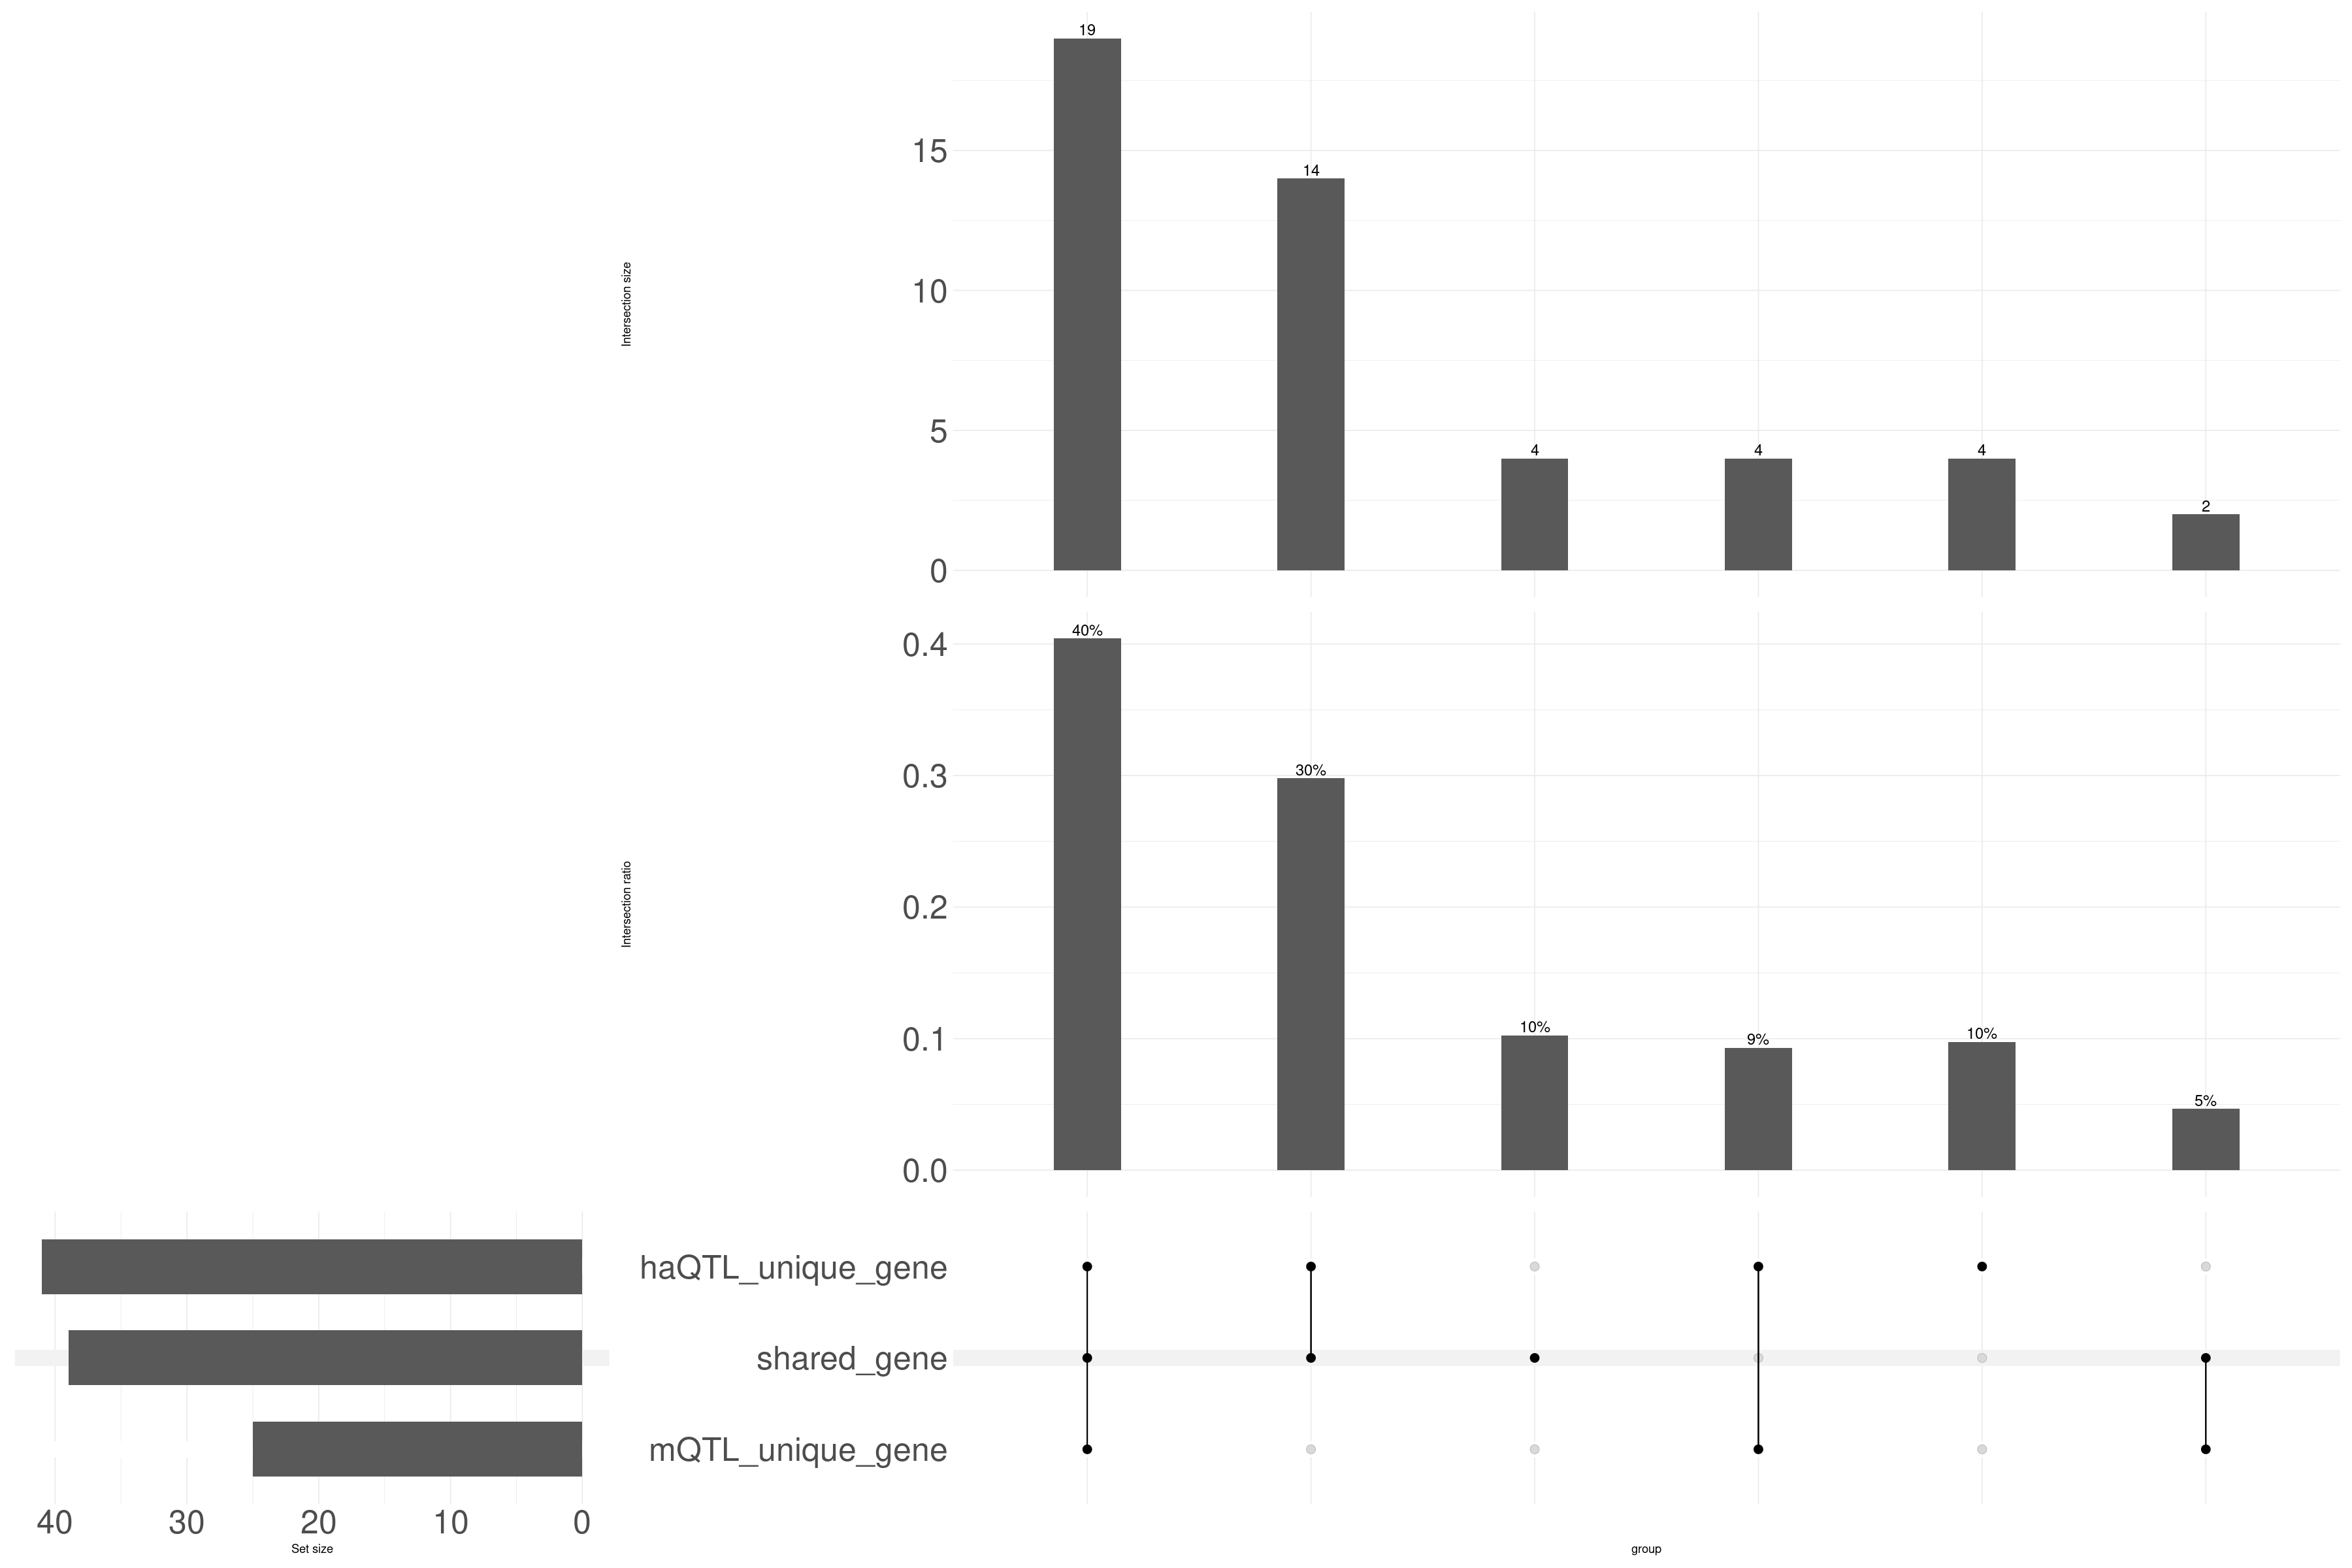

In [120]:
 upset(cs_prop_16_clean%>%as.data.frame,intersect = colnames(cs_prop_16_clean)[5:7],
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 5)  ), `Intersection ratio`=intersection_ratio(text_mapping=aes(label=!!upset_text_percentage()),bar_number_threshold = 1, width = 0.3 ,text = list(size = 5)  )   ) ,
          themes=upset_default_themes(axis.text=element_text(size=30))     ,
          min_degree = 1)

In [121]:
cs_prop_16_clean%>%filter((haQTL_unique_gene == 0) , mQTL_unique_gene == 0 )

molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,haQTL_unique_gene,mQTL_unique_gene,shared_gene
<chr>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>
tad1068,1,tad1068,6,0,0,6
tad1264,1,tad1264,3,0,0,4
tad1273,2,tad1273,4,0,0,6
tad40,2,tad40,6,0,0,8


### Direction of max effect for sharerd haQTL and meQTL with 16

### Estimated Effect size correlation for shared CS 16

In [122]:
ha16_effect = ha16_effect%>%unnest(effect)

In [123]:
m16_effect = m16_effect%>%unnest(effect)

In [124]:
m16_effect = m16_effect%>%pivot_longer(cols = Effect_1:Effect_20, names_to = "effect_order", names_prefix =  "Effect_", values_to =  "effect"  )%>%group_by(effect_order,molecular_trait_id)%>%summarise(max_effect = effect[which(abs(effect) == max(abs(effect)))] )%>%arrange(max_effect)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'effect_order', 'molecular_trait_id'. You
can override using the `.groups` argument.


In [125]:
colnames(ha16_effect)

[1] "molecular_trait_id" "type"               "effect_tibble_path"
 [4] "#chr"               "pos"                "Effect_1"          
 [7] "Effect_2"           "Effect_3"           "Effect_4"          
[10] "Effect_5"           "Effect_6"           "Effect_7"          
[13] "Effect_8"           "Effect_9"           "Effect_10"         
[16] "Effect_11"          "Effect_12"          "Effect_13"         
[19] "Effect_14"          "Effect_15"          "Effect_16"

In [126]:
ha16_effect = ha16_effect%>%pivot_longer(cols = Effect_1:Effect_16, names_to = "effect_order", names_prefix =  "Effect_", values_to =  "effect"  )%>%group_by(effect_order,molecular_trait_id)%>%summarise(max_effect = effect[which(abs(effect) == max(abs(effect)))] )%>%arrange(max_effect)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'effect_order', 'molecular_trait_id'. You
can override using the `.groups` argument.


In [127]:
ha16_effect = ha16_effect%>%rename(cs_order.x = effect_order, molecular_trait_id.x = molecular_trait_id )


In [128]:
ha16_effect = ha16_effect%>%mutate(cs_order.x = as.numeric(cs_order.x))

In [129]:
ha16_effect = ha16_effect%>%rename(max_effect.ha =  max_effect)


In [130]:
colnames(m16_effect)

[1] "effect_order"       "molecular_trait_id" "max_effect"

In [131]:
m16_effect = m16_effect%>%rename(cs_order.y = effect_order, molecular_trait_id.y = molecular_trait_id )


In [132]:
m16_effect = m16_effect%>%mutate(cs_order.y = as.numeric(cs_order.y))

In [133]:
m16_effect = m16_effect%>%rename(max_effect.m =  max_effect)


In [134]:
shared_cs_map_effect = Reduce(inner_join, list(shared_cs_map,ha16_effect,m16_effect ))

Joining with `by = join_by(molecular_trait_id.x, cs_order.x)`
Joining with `by = join_by(molecular_trait_id.y, cs_order.y)`


In [160]:
cs_prop_16e_cat = cs_prop_16_clean%>%mutate( haQTL_unique_gene = (haQTL_unique_gene != 0) , mQTL_unique_gene = (mQTL_unique_gene != 0) ,shared_gene = (shared_gene != 0)  , cat = haQTL_unique_gene + 10*mQTL_unique_gene  + 100*shared_gene)

In [161]:
cs_prop_16e_cat = left_join(shared_cs_map_effect,cs_prop_16e_cat)%>%mutate(cat = coalesce(cat,(0)))

Joining with `by = join_by(molecular_trait_id.x, cs_order.x,
molecular_trait_id.y, cs_order.y)`


In [162]:
color = c("black", "dodgerblue2", "green4", "#6A3D9A",
      "#FF7F00", "gold1", "skyblue2", "#FB9A99", "palegreen2",
      "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
      "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
      "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
      "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
      "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")

In [163]:
sort(as.numeric(cs_prop_16e_cat$cat))

[1]   0   0   0   0   1   1   1   1  11  11  11  11 100 100 100 100 101 101 101
[20] 101 101 101 101 101 101 101 101 101 101 101 110 110 111 111 111 111 111 111
[39] 111 111 111 111 111 111 111 111 111 111 111 111 111

In [164]:
cs_prop_16e_cat%>%group_by(cat)%>%summarize(cor(max_effect.ha,max_effect.m))

cat,"cor(max_effect.ha, max_effect.m)"
<dbl>,<dbl>
0,-0.9749058
1,-0.6002545
11,-0.9756754
100,-0.5985985
101,-0.6431384
110,-1.0000000
111,-0.8422014


In [165]:
cs_prop_16e_cat = cs_prop_16e_cat%>%mutate(cat = ifelse(cat == 111, "All TSS shared by haQTL and mQTL CS, R^2 = -0.84 ",ifelse(cat == 000, "No TSS in affected region, R^2 = -0.97" ,"Others, R^2 = -0.62"  ) )   )

In [166]:
cs_prop_16e_cat%>%group_by(cat)%>%summarize(cor(max_effect.ha,max_effect.m))

cat,"cor(max_effect.ha, max_effect.m)"
<chr>,<dbl>
"All TSS shared by haQTL and mQTL CS, R^2 = -0.84",-0.8422014
"No TSS in affected region, R^2 = -0.97",-0.9749058
"Others, R^2 = -0.62",-0.6255148


In [167]:
e = upset(cs_prop_16e_cat%>%as.data.frame,intersect = c("haQTL_unique_gene","mQTL_unique_gene","shared_gene"),
  keep_empty_groups = F,
      base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 10)  )+ylab("")   ) ,
          themes=upset_default_themes(plot.margin=unit(c(0,0,0,20),"mm"),axis.text=element_text(size=40), axis.title.x = element_blank() ,text=element_text(size=40) )     ,  
          min_degree = 1)

Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
“Detected missing values in the columns indicating sets, coercing to FALSE”


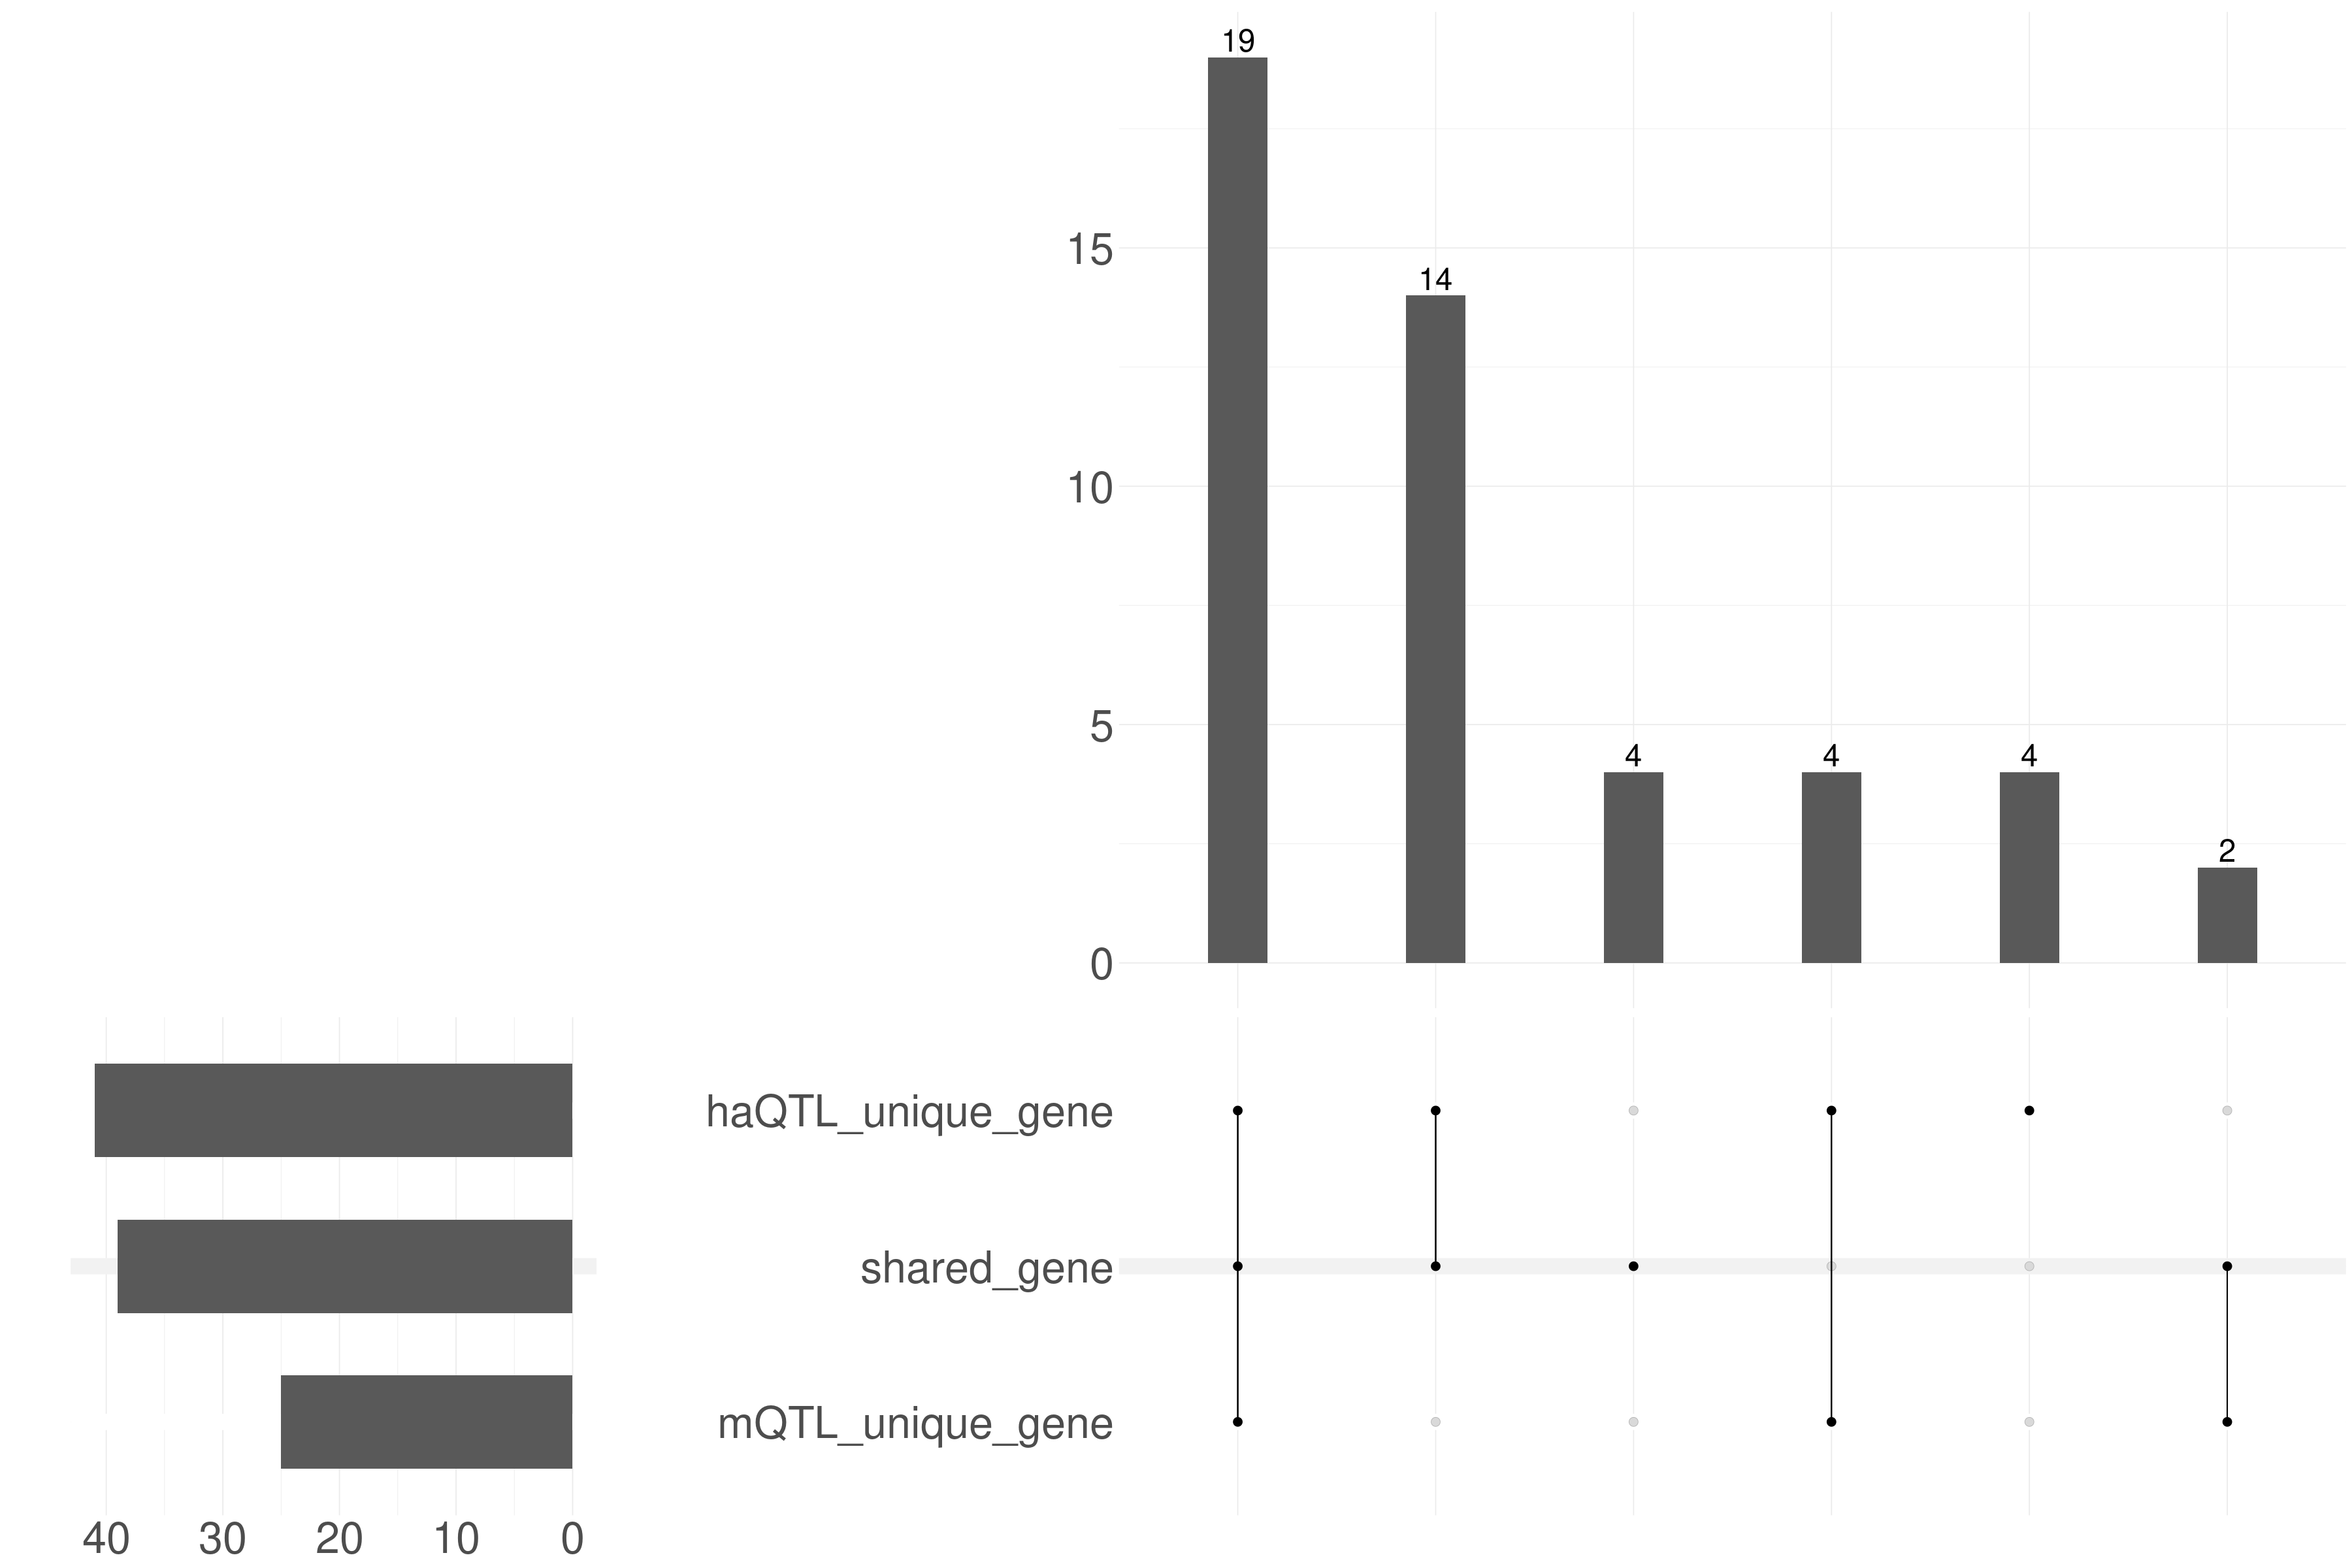

In [168]:
e

In [169]:
cs_prop_16e_cat%>%filter(shared_gene)

molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,n,max_effect.ha,max_effect.m,haQTL_unique_gene,mQTL_unique_gene,shared_gene,cat
<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>
tad1027,3,tad1027,2,1,0.19839914,0.64076441,TRUE,FALSE,TRUE,"Others, R^2 = -0.62"
tad1068,1,tad1068,6,1,0.27939257,-0.07392942,FALSE,FALSE,TRUE,"Others, R^2 = -0.62"
tad1072,4,tad1072,14,1,0.27734093,-0.25624877,TRUE,FALSE,TRUE,"Others, R^2 = -0.62"
tad1085,4,tad1085,2,1,0.33430958,-0.21780242,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.84"
tad1091,1,tad1091,4,1,0.28987809,-0.23706408,TRUE,FALSE,TRUE,"Others, R^2 = -0.62"
tad1125,1,tad1125,5,1,-0.44117746,0.25485487,TRUE,FALSE,TRUE,"Others, R^2 = -0.62"
tad1142,1,tad1142,1,1,0.31802712,-0.68238976,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.84"
tad1158,2,tad1158,1,1,-0.60490501,0.71959609,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.84"
tad1158,4,tad1158,2,1,0.11418645,-0.44821977,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.84"


In [170]:
cs_prop_16e_cat%>%write_delim("2_correlation_superfine.tsv","\t")

In [56]:
cs_prop_16e_cat = read_delim("2_correlation_superfine.tsv","\t")

Rows: 51 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): molecular_trait_id.x, molecular_trait_id.y, cat
dbl (5): cs_order.x, cs_order.y, n, max_effect.ha, max_effect.m
lgl (3): haQTL_unique_gene, mQTL_unique_gene, shared_gene

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [57]:
cs_prop_16e_cat

molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,n,max_effect.ha,max_effect.m,haQTL_unique_gene,mQTL_unique_gene,shared_gene,cat
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>
tad1003,2,tad1003,1,1,-0.29446753,0.71977090,TRUE,FALSE,FALSE,"Others, R^2 = -0.62"
tad1027,1,tad1027,6,1,-0.20018284,0.48964848,TRUE,TRUE,FALSE,"Others, R^2 = -0.62"
tad1027,3,tad1027,2,1,0.19839914,0.64076441,TRUE,FALSE,TRUE,"Others, R^2 = -0.62"
tad1068,1,tad1068,6,1,0.27939257,-0.07392942,FALSE,FALSE,TRUE,"Others, R^2 = -0.62"
tad1072,4,tad1072,14,1,0.27734093,-0.25624877,TRUE,FALSE,TRUE,"Others, R^2 = -0.62"
tad1085,4,tad1085,2,1,0.33430958,-0.21780242,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.84"
tad1091,1,tad1091,4,1,0.28987809,-0.23706408,TRUE,FALSE,TRUE,"Others, R^2 = -0.62"
tad1125,1,tad1125,5,1,-0.44117746,0.25485487,TRUE,FALSE,TRUE,"Others, R^2 = -0.62"
tad1142,1,tad1142,1,1,0.31802712,-0.68238976,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.84"


Warning message in geom_point(aes(color = cat), size = 10, method = "lm"):
“Ignoring unknown parameters: `method`”
`geom_smooth()` using formula = 'y ~ x'


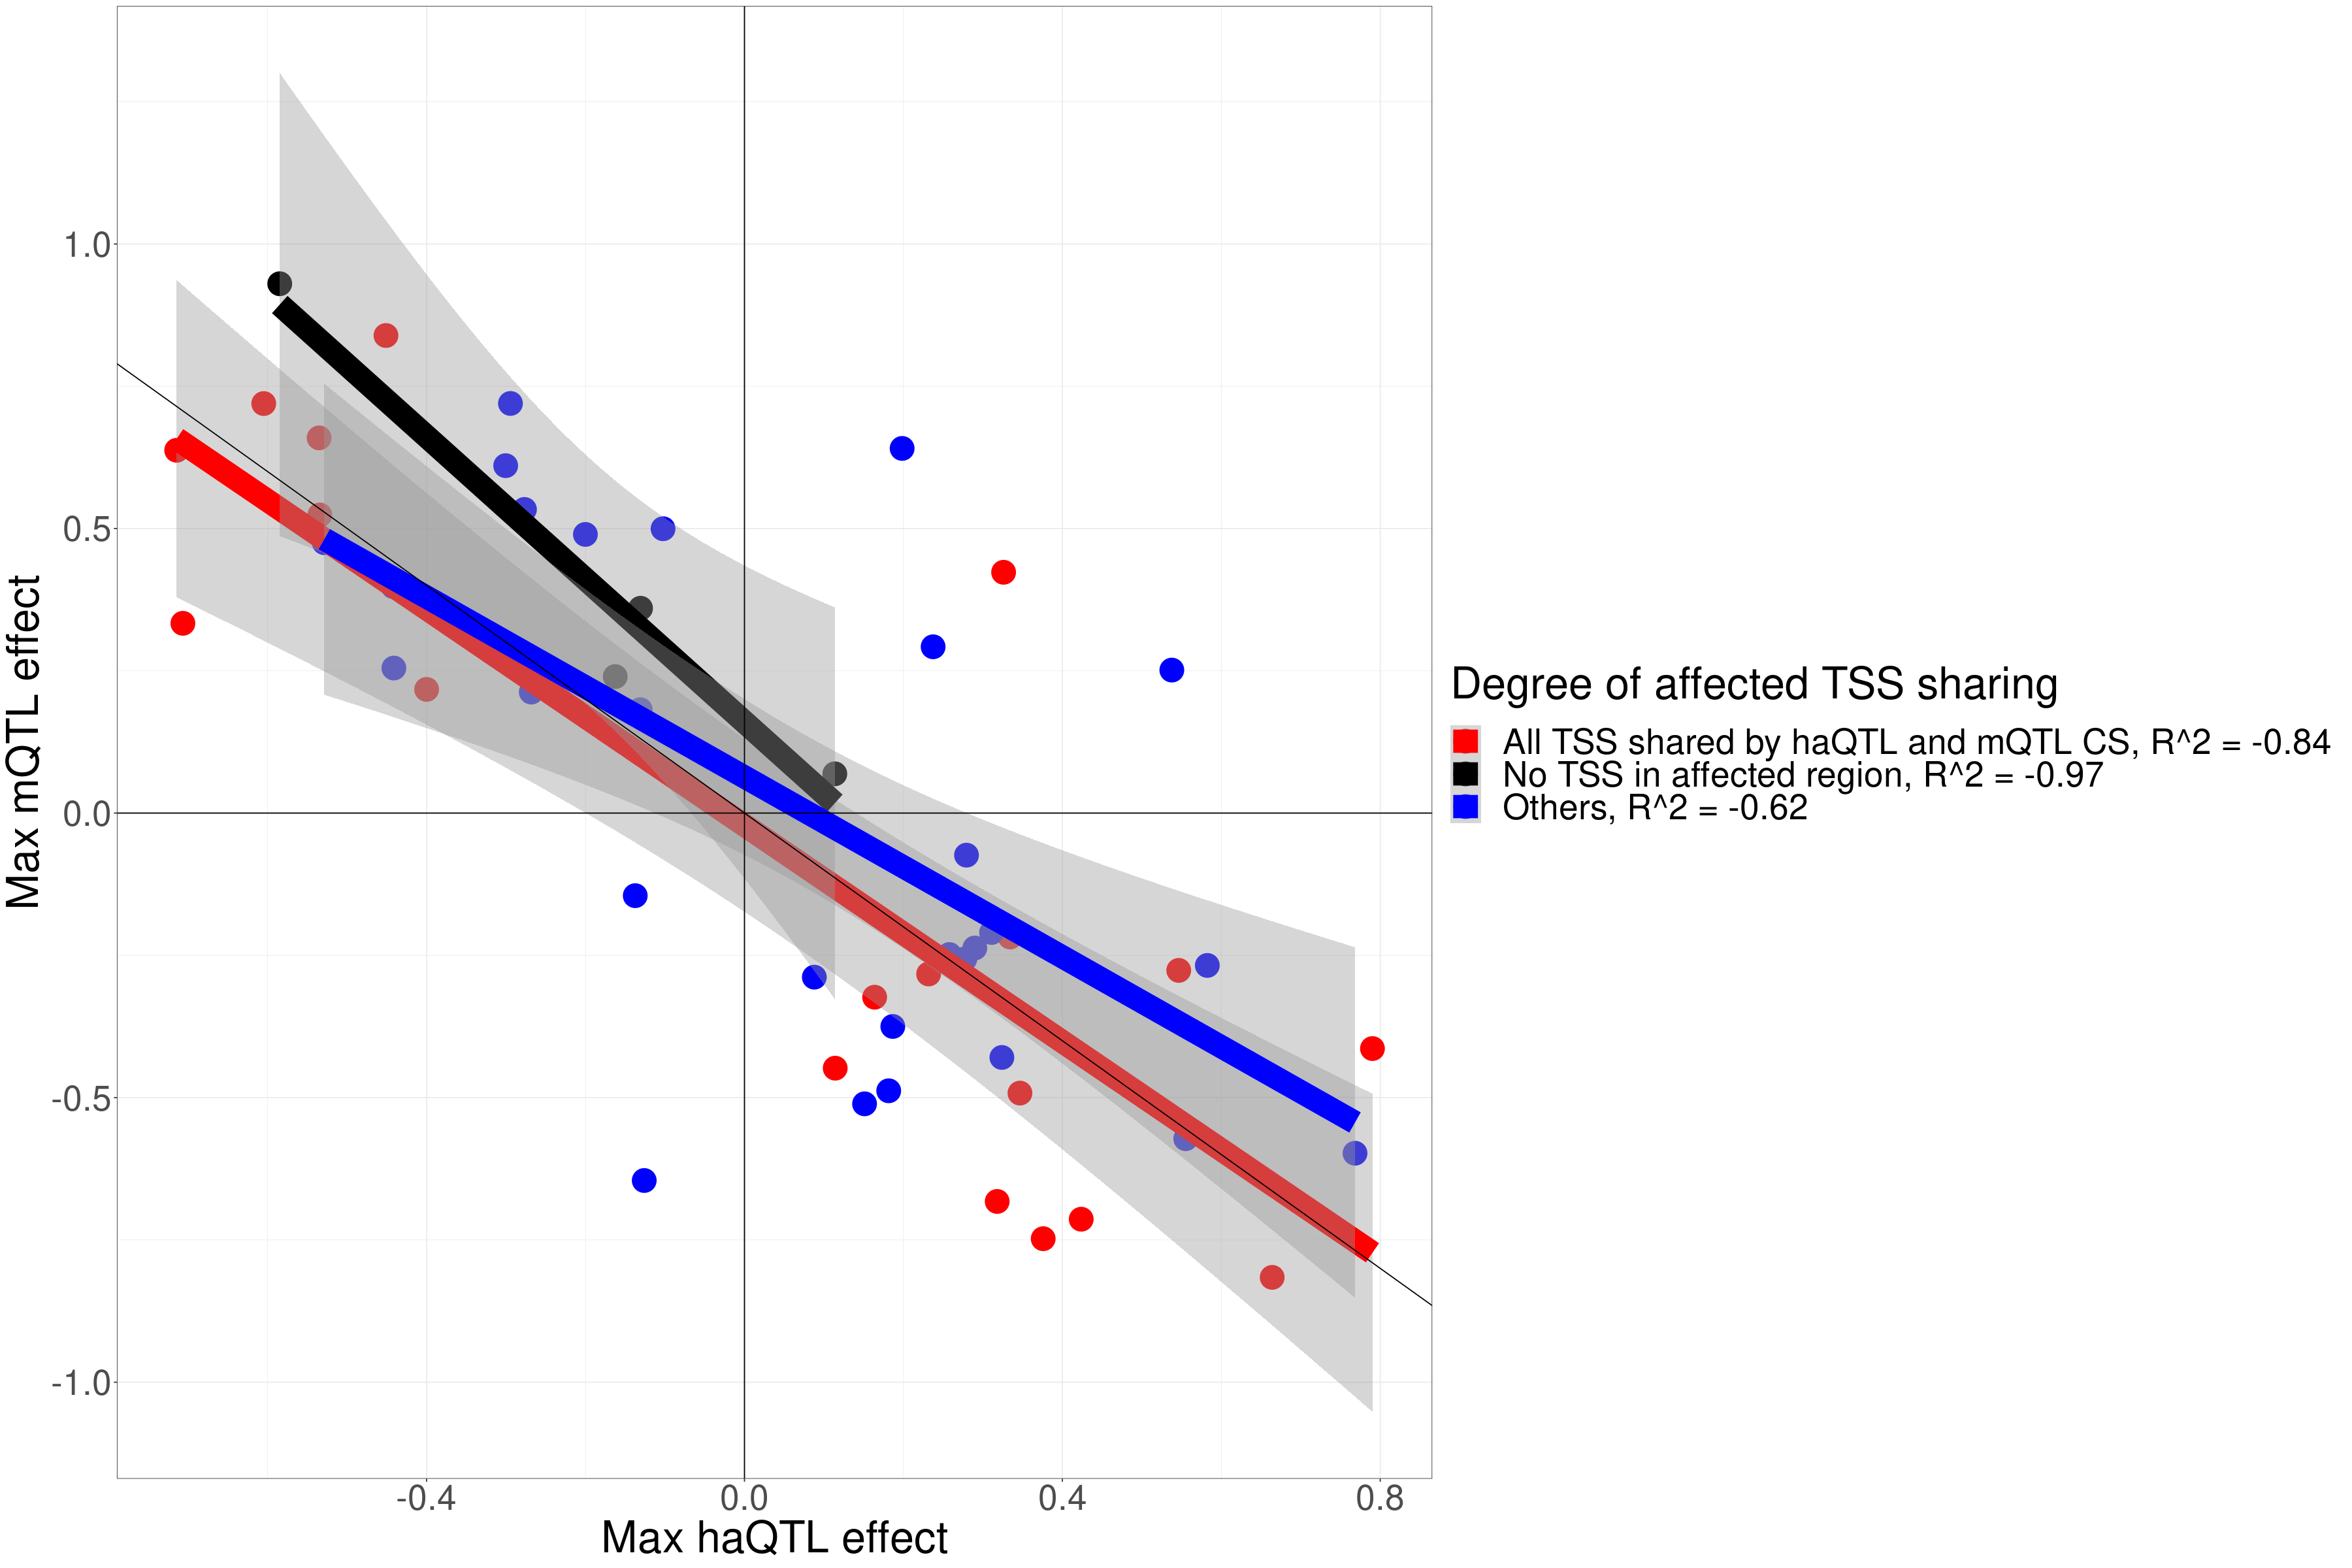

In [221]:
cs_prop_16e_cat%>%ggplot(aes(x = max_effect.ha, y = max_effect.m  ))+geom_point(aes(color = cat), size = 10,method = "lm")+geom_smooth(aes(color = cat), size = 10,method = "lm")+geom_vline( xintercept = 0) + geom_hline(yintercept = 0) + geom_abline(slope = -1) +xlab("Max haQTL effect")+ ylab("Max mQTL effect")  + theme_bw()+   theme(text = element_text(size = 40))  +   scale_color_manual("Degree of affected TSS sharing",values = c("red","black","blue")) 

In [224]:
cs_prop_16e_cat%>%filter(sign(max_effect.ha) ==sign(max_effect.m))

molecular_trait_id.x,cs_order.x,molecular_trait_id.y,cs_order.y,n,max_effect.ha,max_effect.m,haQTL_unique_gene,mQTL_unique_gene,shared_gene,cat
<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>
tad1027,3,tad1027,2,1,0.1983991,0.64076441,TRUE,FALSE,TRUE,"Others, R^2 = -0.62"
tad1181,5,tad1181,12,1,-0.1374485,-0.14511053,FALSE,TRUE,TRUE,"Others, R^2 = -0.62"
tad1273,2,tad1273,4,1,0.5377733,0.25127487,FALSE,FALSE,TRUE,"Others, R^2 = -0.62"
tad146,4,tad146,1,1,-0.1261404,-0.64558348,TRUE,FALSE,FALSE,"Others, R^2 = -0.62"
tad219,1,tad219,6,1,0.1137007,0.06899828,NA,NA,NA,"No TSS in affected region, R^2 = -0.97"
tad674,2,tad674,4,1,0.3260725,0.42313628,TRUE,TRUE,TRUE,"All TSS shared by haQTL and mQTL CS, R^2 = -0.84"
tad685,1,tad685,10,1,0.2373955,0.29221534,TRUE,FALSE,TRUE,"Others, R^2 = -0.62"


In [225]:
m16%>%filter(molecular_trait_id == "tad674")

variants,snps_index,chromosome,position,ref,alt,cs_order,pip,molecular_trait_id,finemapped_region_start,finemapped_region_end,purity,is_dummy,effect_peak_pos,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr7:73647689_C_G,742,7,73647689,C,G,4,1.0000000,tad674,73200000,74760000,1,0,73626892,1
chr7:73721812_C_A,889,7,73721812,C,A,7,1.0000000,tad674,73200000,74760000,1,0,73827449,1
chr7:73743151_C_A,961,7,73743151,C,A,5,0.9993405,tad674,73200000,74760000,1,0,73913458,1
chr7:73975216_G_C,1472,7,73975216,G,C,2,1.0000000,tad674,73200000,74760000,1,0,74122143,1
chr7:73996585_C_T,1498,7,73996585,C,T,10,1.0000000,tad674,73200000,74760000,1,0,74159717,1
chr7:74077660_CA_CAA,1671,7,74077660,CA,CAA,12,0.9774864,tad674,73200000,74760000,1,0,74210589,1


Warning message in geom_point(aes(color = cat), size = 10, method = "lm"):
“Ignoring unknown parameters: `method`”


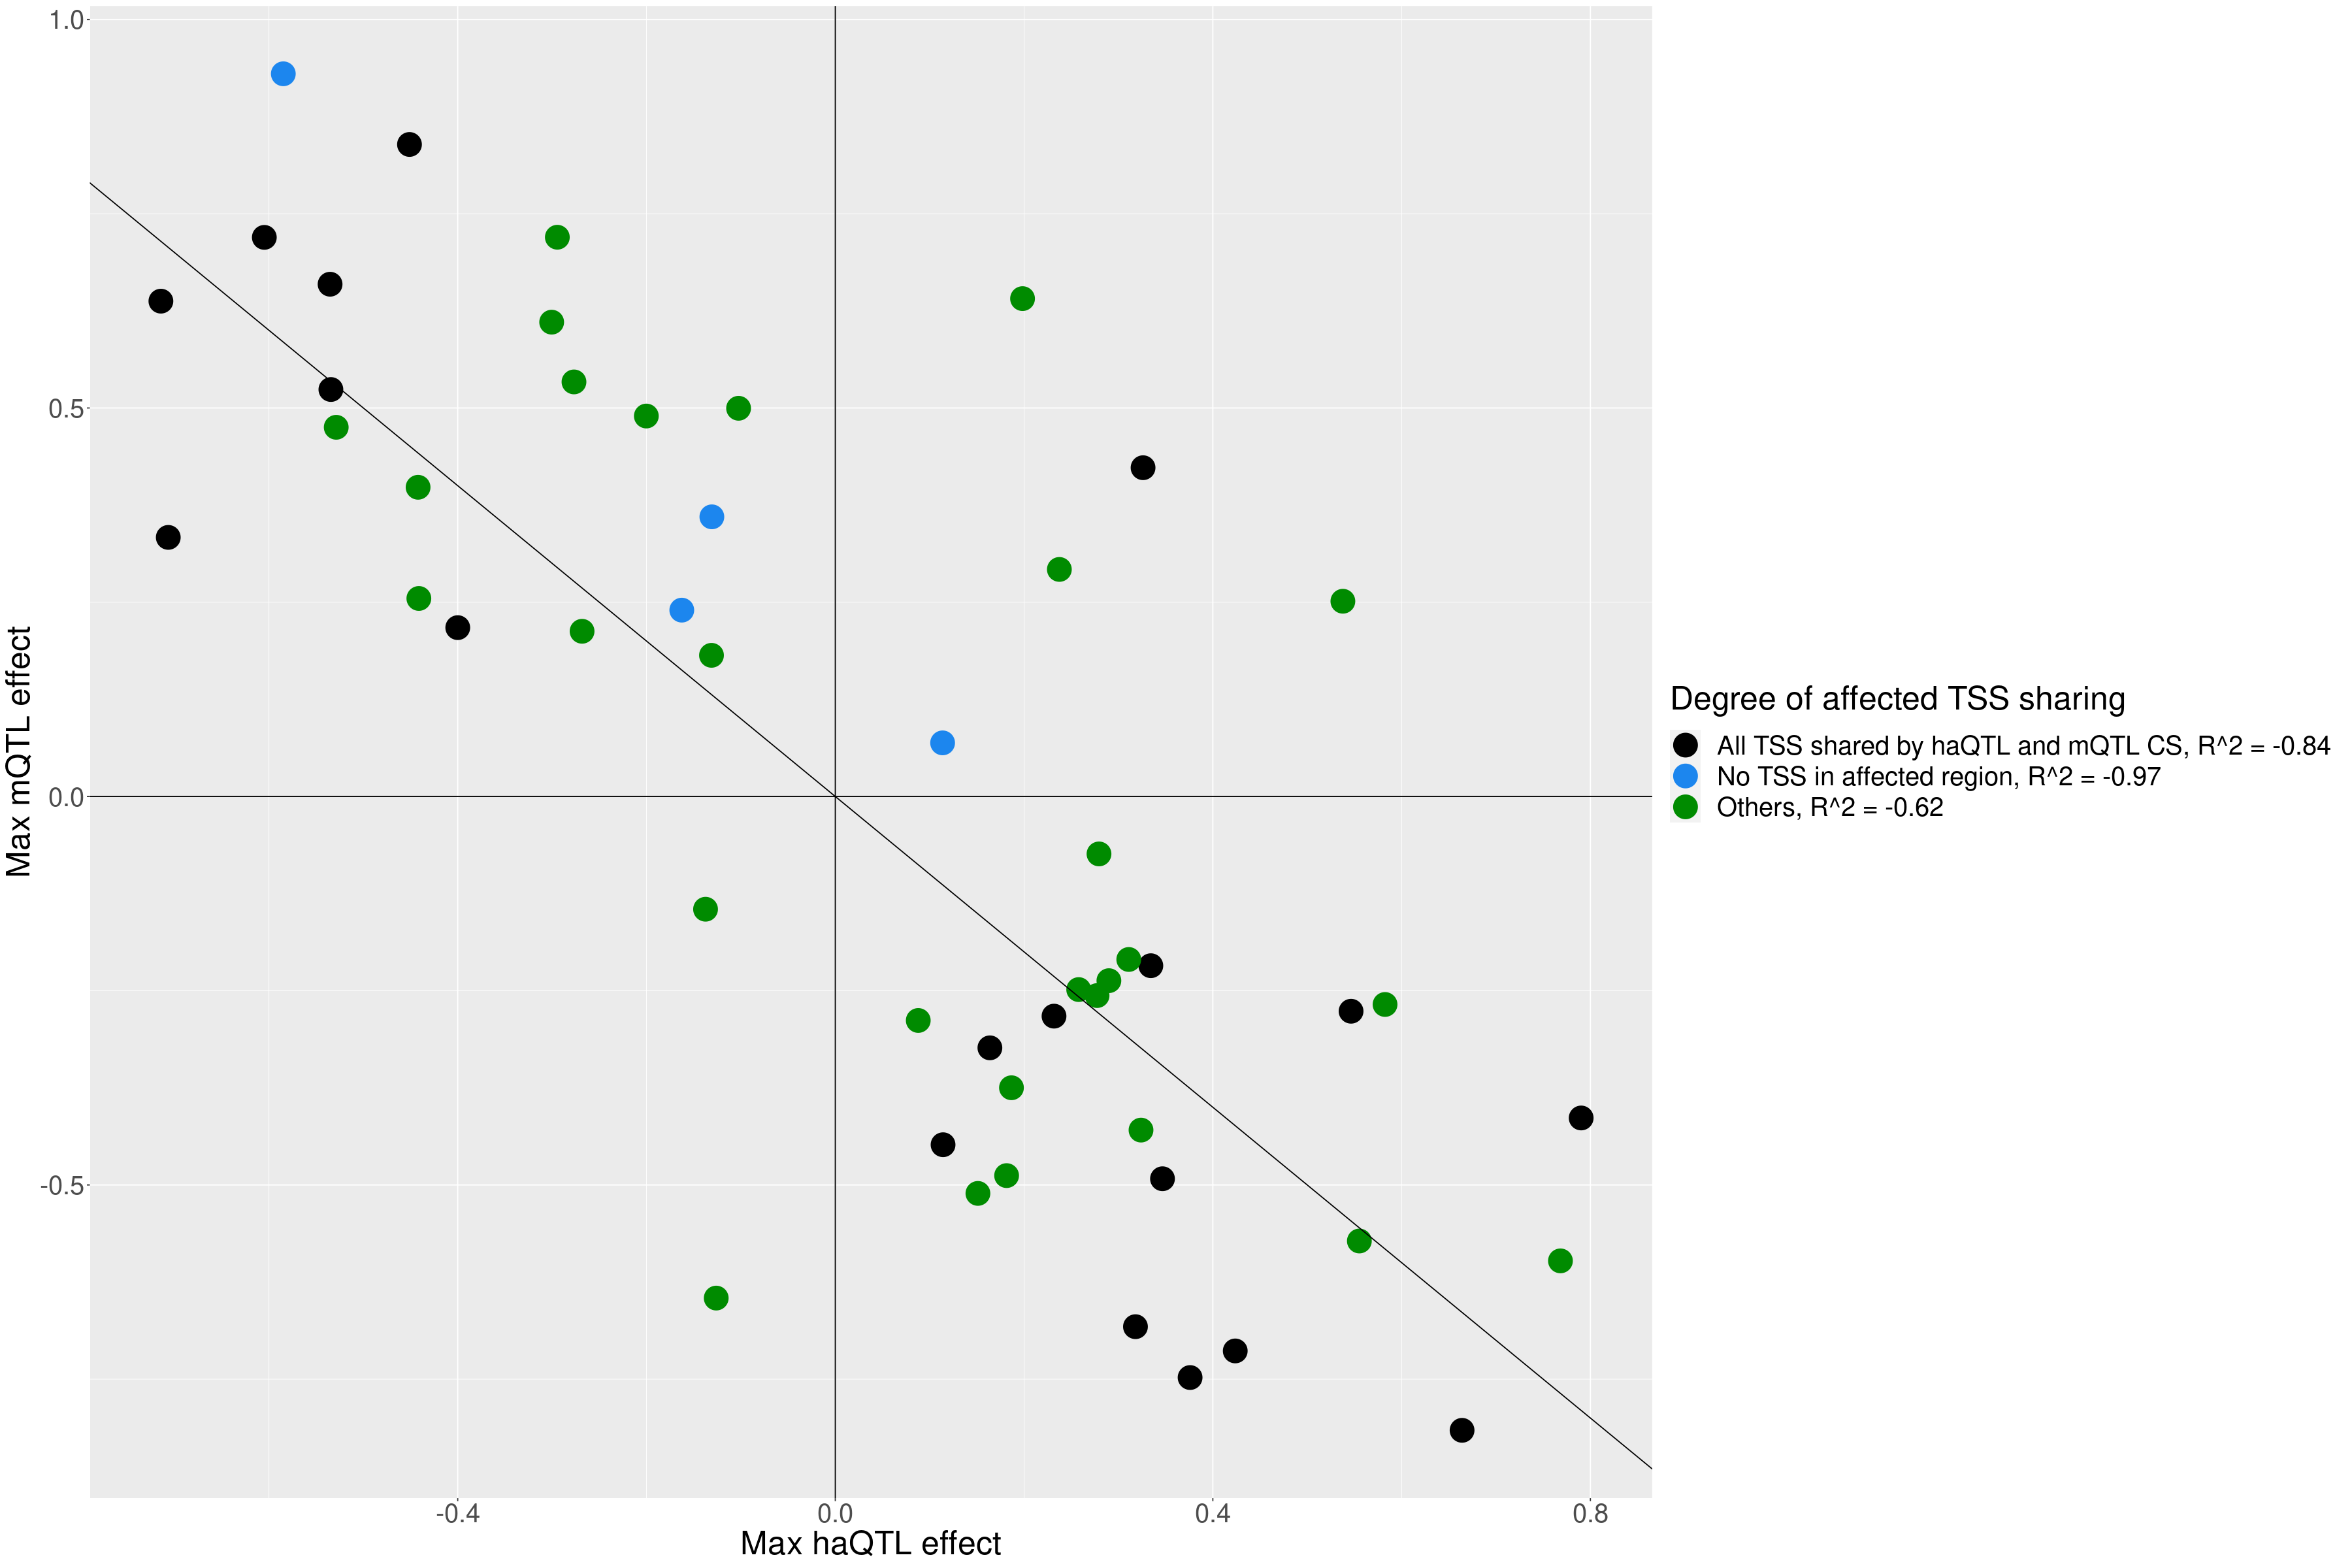

In [172]:
cs_prop_16e_cat%>%ggplot(aes(x = max_effect.ha, y = max_effect.m  ))+geom_point(aes(color = cat), size = 10,method = "lm")+geom_vline( xintercept = 0) + geom_hline(yintercept = 0) + geom_abline(slope = -1) +xlab("Max haQTL effect")+ ylab("Max mQTL effect")  +   theme(text = element_text(size = 30))  +   scale_color_manual("Degree of affected TSS sharing",values = color) 

In [228]:
eQTL%>%filter(position == 73647689)

variants,snps_index,chromosome,position,ref,alt,cs_order,cs_id,log10_base_factor,pip,posterior_mean,posterior_sd,z,molecular_trait_id,finemapped_region_start,finemapped_region_end,cs_size
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>


In [173]:
colnames(ha16_effect)

[1] "cs_order.x"           "molecular_trait_id.x" "max_effect.ha"

In [174]:
colnames(m16_effect)

[1] "cs_order.y"           "molecular_trait_id.y" "max_effect.m"

In [175]:
mQTL_tsv = m16%>%filter(variants %in% three_shared_snp$variants)%>%count(cs_order,molecular_trait_id)

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mℹ[39m In argument: `variants %in% three_shared_snp$variants`.
[1mCaused by error in `variants %in% three_shared_snp$variants`:[22m
[33m![39m object 'three_shared_snp' not found


In [ ]:
effect = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_meQTL_effect/All_meQTL_effect.tsv")

In [ ]:
mQTL_tsv = mQTL_tsv%>%mutate(effect = map(molecular_trait_id, ~read_delim(paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_meQTL_effect/meQTL.yuqi_mqtl.",.x,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv"))))

In [176]:
mQTL_effect = mQTL_tsv%>%unnest(effect)%>%pivot_longer(cols = Effect_1:Effect_20, names_to = "effect_order", names_prefix =  "Effect_", values_to =  "effect"  )%>%
        filter(effect_order == cs_order)%>%group_by(cs_order,molecular_trait_id)%>%summarise(max_effect = effect[which(abs(effect) == max(abs(effect)))] )%>%arrange(max_effect)

ERROR: Error in unnest(., effect): object 'mQTL_tsv' not found


In [177]:
haQTL_tsv = haQTL_pure_completed_unlimted%>%filter(variants %in% three_shared_snp$variants)%>%count(cs_order,molecular_trait_id)

ERROR: Error in filter(., variants %in% three_shared_snp$variants): object 'haQTL_pure_completed_unlimted' not found


In [178]:
haQTL_tsv = haQTL_tsv%>%mutate(effect = map(molecular_trait_id, 
                    ~read_delim(paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_haQTL_effect/haQTL.rosmap_haqtl.",.x,".uni_Fsusie.mixture_normal_per_scale.estimated_effect.tsv"))))

ERROR: Error in mutate(., effect = map(molecular_trait_id, ~read_delim(paste0("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/all_haQTL_effect/haQTL.rosmap_haqtl.", : object 'haQTL_tsv' not found


In [179]:
haQTL_tsv%>%unnest(effect)%>%colnames

ERROR: Error in unnest(., effect): object 'haQTL_tsv' not found


In [180]:
haQTL_effect = haQTL_tsv%>%unnest(effect)%>%pivot_longer(cols = Effect_1:Effect_13, names_to = "effect_order", names_prefix =  "Effect_", values_to =  "effect"  )%>%
        filter(effect_order == cs_order)%>%group_by(cs_order,molecular_trait_id)%>%summarise(max_effect = effect[which(abs(effect) == max(abs(effect)))] )%>%arrange(max_effect)

ERROR: Error in unnest(., effect): object 'haQTL_tsv' not found


In [ ]:
shared_cs_effect = inner_join(inner_join(shared_cs_map, haQTL_effect, by = c("molecular_trait_id.x" = "molecular_trait_id","cs_order.x" = "cs_order"  )), 
           mQTL_effect, by = c("molecular_trait_id.y" = "molecular_trait_id","cs_order.y" = "cs_order"  ) )

In [ ]:
eQTL_effect = eQTL%>%filter(variants %in% three_shared_snp$variants)%>%select(variants,cs_order,z,molecular_trait_id,finemapped_region_start,finemapped_region_end)

In [181]:
eQTL%>%filter( molecular_trait_id == "ENSG00000248905",  cs_order == "c(L1 = 1)" )%>%summarize(z = sum(z))

z
<dbl>
0


In [182]:
ha_e_sharing_effect = ha_e_sharing_effect%>%group_by(molecular_trait_id.x,cs_order.x,molecular_trait_id.y,z )%>%summarize(max_z = z[which(abs(z) == max(abs(z)))] )

ERROR: Error in group_by(., molecular_trait_id.x, cs_order.x, molecular_trait_id.y, : object 'ha_e_sharing_effect' not found


In [183]:
ha_e_sharing_effect = inner_join(haQTL_pure_completed_unlimted%>%filter(variants %in% three_shared_snp$variants),eQTL_effect,by = "variants")

ERROR: Error in filter(., variants %in% three_shared_snp$variants): object 'haQTL_pure_completed_unlimted' not found


In [184]:
sign(-2)

[1] -1

In [185]:
pot_result = inner_join(shared_cs_effect, ha_e_sharing_effect , by = c("molecular_trait_id.x", "cs_order.x"))%>%filter(sign(z) == sign(max_effect.x), sign(z) != sign(max_effect.y)  )%>%filter(abs(max_z) > 1 )

ERROR: Error in inner_join(shared_cs_effect, ha_e_sharing_effect, by = c("molecular_trait_id.x", : object 'shared_cs_effect' not found


This is the posterial beta/se of lead snp, not times pip


In [186]:
eQTL_effect = eQTL%>%filter(variants %in% three_shared_snp$variants)%>%select(variants,cs_order,z,molecular_trait_id,finemapped_region_start,finemapped_region_end)

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mℹ[39m In argument: `variants %in% three_shared_snp$variants`.
[1mCaused by error in `variants %in% three_shared_snp$variants`:[22m
[33m![39m object 'three_shared_snp' not found


In [ ]:
pot_result

In [187]:
pot_result_non_sig = inner_join(shared_cs_effect, ha_e_sharing_effect , by = c("molecular_trait_id.x", "cs_order.x"))%>%filter(sign(z) == sign(max_effect.x), sign(z) != sign(max_effect.y)  ) 

ERROR: Error in inner_join(shared_cs_effect, ha_e_sharing_effect, by = c("molecular_trait_id.x", : object 'shared_cs_effect' not found


In [188]:
pot_result_non_sig%>%ggplot(aes(x = max_effect.x, y =max_effect.y))+geom_point()

ERROR: Error in ggplot(., aes(x = max_effect.x, y = max_effect.y)): object 'pot_result_non_sig' not found


In [189]:
pot_result

ERROR: Error in eval(expr, envir, enclos): object 'pot_result' not found


## Density of cpg/ha peaks in estimated efffect

####  MQTL phenotype

In [190]:
ha_peak = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/ha_peak_list")

Rows: 92401 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): #chr, ID
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [191]:
m_peak = read_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/methylation_cpg_list")

Rows: 395070 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): #chr, ID
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [196]:
shared_cs_map_cpg = inner_join(shared_cs_map,mQTL_affected_region,by = c("molecular_trait_id.x" = "molecular_trait_id", "cs_order.x" = "CS") )

In [197]:
mQTL_affected_region_peak = inner_join(mQTL_affected_region,m_peak,by = c("chr" = "#chr") )

Warning message in inner_join(mQTL_affected_region, m_peak, by = c(chr = "#chr")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [198]:
mQTL_affected_region_peak

CS,Start,End,analysis,chr,molecular_trait_id,purity,start,end,ID
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<chr>
1,19382362,19384654,yuqi_mqtl,chr1,tad10,NA,870161,870162,cg16619049
1,19382362,19384654,yuqi_mqtl,chr1,tad10,NA,877159,877160,cg18147296
1,19382362,19384654,yuqi_mqtl,chr1,tad10,NA,898803,898804,cg13938959
1,19382362,19384654,yuqi_mqtl,chr1,tad10,NA,898915,898916,cg12445832
1,19382362,19384654,yuqi_mqtl,chr1,tad10,NA,898976,898977,cg23999112
1,19382362,19384654,yuqi_mqtl,chr1,tad10,NA,902156,902157,cg11527153
1,19382362,19384654,yuqi_mqtl,chr1,tad10,NA,902999,903000,cg27573606
1,19382362,19384654,yuqi_mqtl,chr1,tad10,NA,903106,903107,cg04195702
1,19382362,19384654,yuqi_mqtl,chr1,tad10,NA,904055,904056,cg08128007


In [199]:
mQTL_affected_region_peak = inner_join(m16%>%count(chromosome,molecular_trait_id,cs_order,finemapped_region_start,finemapped_region_end )%>%mutate(`#chr` = paste0("chr", chromosome ) ),m_peak ) 

Joining with `by = join_by(`#chr`)`
Warning message in inner_join(m16 %>% count(chromosome, molecular_trait_id, cs_order, :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [200]:
mQTL_affected_region_peak = mQTL_affected_region_peak%>%filter(start > finemapped_region_start, start <  finemapped_region_end )

In [201]:
mQTL_affected_region_peak = inner_join(mQTL_affected_region,mQTL_affected_region_peak%>%select(CS = cs_order,start,molecular_trait_id) )

Joining with `by = join_by(CS, molecular_trait_id)`
Warning message in inner_join(mQTL_affected_region, mQTL_affected_region_peak %>% :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 31 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [202]:
mQTL_affected_region_peak = mQTL_affected_region_peak%>%filter( start > Start , start < End)

In [203]:
mQTL_affected_region_peak%>%count( molecular_trait_id, CS )%>%count(n)

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.


n,nn
<int>,<int>
1,377
2,231
3,195
4,130
5,114
6,103
7,96
8,67
9,78


In [204]:
colnames(mQTL_affected_region_peak)

[1] "CS"                 "Start"              "End"               
[4] "analysis"           "chr"                "molecular_trait_id"
[7] "purity"             "start"

In [205]:
mQTL_affected_region_peak%>%write_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/methylation+_affected_cpg_list_super_fine","\t")

#### HaQTL phenotype

In [206]:
shared_cs_map_ha = inner_join(shared_cs_map,haQTL_affected_region,by = c("molecular_trait_id.x" = "molecular_trait_id", "cs_order.x" = "CS") )

In [207]:
haQTL_affected_region_peak = inner_join(h16%>%count(chromosome,molecular_trait_id,cs_order,finemapped_region_start,finemapped_region_end )%>%mutate(`#chr` = paste0("chr", chromosome ) ),ha_peak ) 

Joining with `by = join_by(`#chr`)`
Warning message in inner_join(h16 %>% count(chromosome, molecular_trait_id, cs_order, :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [208]:
haQTL_affected_region_peak = haQTL_affected_region_peak%>%filter(start > finemapped_region_start, start <  finemapped_region_end )

In [209]:
haQTL_affected_region_peak = inner_join(haQTL_affected_region,haQTL_affected_region_peak%>%select(CS = cs_order,start,molecular_trait_id) )

Joining with `by = join_by(CS, molecular_trait_id)`
Warning message in inner_join(haQTL_affected_region, haQTL_affected_region_peak %>% :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [210]:
haQTL_affected_region_peak = haQTL_affected_region_peak%>%filter( start > Start , start < End)

In [211]:
haQTL_affected_region_peak%>%count( molecular_trait_id, CS )%>%count(n)

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.


n,nn
<int>,<int>
1,70
2,43
3,43
4,33
5,30
6,24
7,15
8,18
9,13


In [212]:
colnames(haQTL_affected_region_peak)

[1] "CS"                 "Start"              "End"               
[4] "analysis"           "chr"                "molecular_trait_id"
[7] "purity"             "start"

In [213]:
haQTL_affected_region

CS,Start,End,analysis,chr,molecular_trait_id,purity
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>
1,2014812.3,2014812.3,rosmap_haqtl,chr1,tad1,NA
1,2056493.6,2065798.9,rosmap_haqtl,chr1,tad1,NA
1,2141402.3,2165187.8,rosmap_haqtl,chr1,tad1,NA
1,2192041.5,2192041.5,rosmap_haqtl,chr1,tad1,NA
1,2437928.6,2437928.6,rosmap_haqtl,chr1,tad1,NA
1,2466041.8,2466041.8,rosmap_haqtl,chr1,tad1,NA
1,3373659.3,3375569.6,rosmap_haqtl,chr1,tad1,NA
1,3594738.4,3649557.9,rosmap_haqtl,chr1,tad1,NA
1,2074311.8,2091992.2,rosmap_haqtl,chr1,tad1,NA


In [214]:
haQTL_affected_region_peak%>%write_delim("/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/haQTL_affected_peak_list_super_fine","\t")

In [215]:
haQTL_affected_region_peak

CS,Start,End,analysis,chr,molecular_trait_id,purity,start
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>
1,2141402,2165188,rosmap_haqtl,chr1,tad1,NA,2158311
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3598285
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3599512
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3618755
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3621084
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3623669
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3625803
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3631271
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3649540


In [216]:
## Distribution of number of affected TSS for both molecular phenotypes

In [217]:
haQTL_affected_region_peak

CS,Start,End,analysis,chr,molecular_trait_id,purity,start
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>
1,2141402,2165188,rosmap_haqtl,chr1,tad1,NA,2158311
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3598285
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3599512
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3618755
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3621084
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3623669
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3625803
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3631271
1,3594738,3649558,rosmap_haqtl,chr1,tad1,NA,3649540
